# Microsoft Stock Prices Prediction & US Regional Sales Analysis

By: Devashri Narendrabhai Chauhan (CWID:20020187)

Course: MA-641 Time Series Analysis - I

Prof: Dr. Hadi K. Safari

Stevens Institute of Technology, Hoboken, New Jersey, USA
Year: 2024


# Introduction & Problem Identification

In this project, we analyse 2 Non-Seasonal datasets:
1. Microsoft Stock Prices (Financial Dataset)
2. US Regional Sales (Non-Financial Dataset)

Our main objective is to find the best model that fits both these datasets correctly with residuals showing minimum correlation among them across different time lags. We consider several ARIMA and GARCH models and find out the best combination of orders of AR and MA to fit the dataset. Further, we use forecasting to predict near future values and observe how the fitted model works for the data.

Analysing a time series data, helps identify the trends, seasonality, and systematic patterns over the time. It also helps in making predictions in upcoming period of time.

# Data Description

Both the datasets have been collected from Kaggle. The datasets can be accessed with the links provided below:

1. [Microsoft Stock Prices](https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis)
2. [US Regional Sales](https://www.kaggle.com/datasets/talhabu/us-regional-sales-data)

The Microsoft Stock Dataset gives information about the opening, closing, high and low prices along with Volume. Here in this project only the Closing Prices and Date column is used.

The US Regional Sales Dataset gives information about the order, shipping dates, order IDs, quantities, unit prices, etc. Here in this project only the Unit Prices and Order Date column is used, and using order date, we predict the Unit Prices.

#Microsoft Stock Prices Prediction (Non-Seasonal)

In [ ]:
install.packages('TSA')
install.packages('lubridate')
install.packages('tseries')
install.packages('CADFtest')
install.packages("dplyr")
install.packages("magrittr")

library(dplyr)
library(magrittr)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘lmtest’, ‘dynlm’, ‘sandwich’, ‘urca’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff,

In [ ]:
install.packages("stats")
install.packages("forecast")
library(stats)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘timeDate’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
library(TSA)

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [ ]:
library(CADFtest)

Loading required package: dynlm

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: tseries

Loading required package: urca

Registered S3 methods overwritten by 'CADFtest':
  method     from    
  bread.mlm  sandwich
  estfun.mlm sandwich



In [ ]:
# library(ggplot2)
# library(dplyr)

In [ ]:
ms_stock = read.table('Microsoft_Stock.csv', header=TRUE, sep=',')
head(ms_stock)
tail(ms_stock)

,Date,Open,High,Low,Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
2,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
3,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
4,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
5,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
6,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861


,Date,Open,High,Low,Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1506,3/24/2021 16:00:00,237.85,238.00,235.32,235.46,25620127
1507,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1508,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1509,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1510,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1511,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [ ]:
ms_stock$Date = trimws(ms_stock$Date)
ms_stock$Date = as.POSIXct(ms_stock$Date, format="%m/%d/%Y %H:%M:%S", tz="UTC")
head(ms_stock)

,Date,Open,High,Low,Close,Volume
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
3,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
4,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
5,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
6,2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861


In [ ]:
ms_stock$Date = as.Date(ms_stock$Date)
head(ms_stock)

,Date,Open,High,Low,Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2015-04-01,40.60,40.76,40.31,40.72,36865322
2,2015-04-02,40.66,40.74,40.12,40.29,37487476
3,2015-04-06,40.34,41.78,40.18,41.55,39223692
4,2015-04-07,41.61,41.91,41.31,41.53,28809375
5,2015-04-08,41.48,41.69,41.04,41.42,24753438
6,2015-04-09,41.25,41.62,41.25,41.48,25723861


In [ ]:
tail(ms_stock)

,Date,Open,High,Low,Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1506,2021-03-24,237.85,238.00,235.32,235.46,25620127
1507,2021-03-25,235.30,236.94,231.57,232.34,34061853
1508,2021-03-26,231.55,236.71,231.55,236.48,25479853
1509,2021-03-29,236.59,236.80,231.88,235.24,25227455
1510,2021-03-30,233.53,233.85,231.10,231.85,24792012
1511,2021-03-31,232.91,239.10,232.39,235.77,43623471


In [ ]:
# ms_stock$Month <- month(ms_stock$Date, label = FALSE)
ms_stock$Year <- year(ms_stock$Date)
head(ms_stock)
tail(ms_stock)

,Date,Open,High,Low,Close,Volume,Year
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2015-04-01,40.60,40.76,40.31,40.72,36865322,2015
2,2015-04-02,40.66,40.74,40.12,40.29,37487476,2015
3,2015-04-06,40.34,41.78,40.18,41.55,39223692,2015
4,2015-04-07,41.61,41.91,41.31,41.53,28809375,2015
5,2015-04-08,41.48,41.69,41.04,41.42,24753438,2015
6,2015-04-09,41.25,41.62,41.25,41.48,25723861,2015


,Date,Open,High,Low,Close,Volume,Year
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1506,2021-03-24,237.85,238.00,235.32,235.46,25620127,2021
1507,2021-03-25,235.30,236.94,231.57,232.34,34061853,2021
1508,2021-03-26,231.55,236.71,231.55,236.48,25479853,2021
1509,2021-03-29,236.59,236.80,231.88,235.24,25227455,2021
1510,2021-03-30,233.53,233.85,231.10,231.85,24792012,2021
1511,2021-03-31,232.91,239.10,232.39,235.77,43623471,2021


In [ ]:
# class(ms_stock$Date)

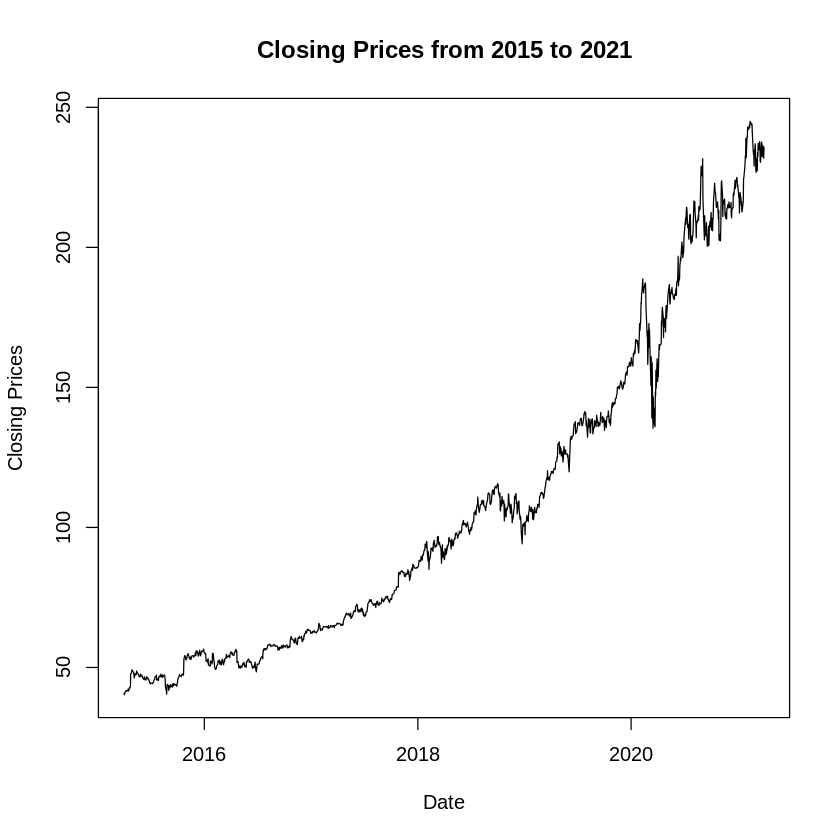

In [ ]:
plot(ms_stock$Date, ms_stock$Close, type='l', xlab="Date", ylab="Closing Prices", main="Closing Prices from 2015 to 2021")

This is the original time series plot. We can clearly observe that there is an **increasing trend** and the series is **non-stationary**.

In [ ]:
# close <- data.frame(Year=ms_stock$Year, Close=ms_stock$Close)
# head(close)
# # tail(close)

In [ ]:
req_series1 = ms_stock[, c("Date", "Close")]

In [ ]:
data = req_series1$Close
head(data)

[1] 40.72 40.29 41.55 41.53 41.42 41.48

Creating a Time Series Object

In [ ]:
close.ts = ts(data = data, start=c(2015,4), frequency = 365)
close.ts

A Time Series:
   [1]  40.72  40.29  41.55  41.53  41.42  41.48  41.72  41.76  41.65  42.26
  [11]  42.16  41.62  42.91  42.64  42.99  43.34  47.87  48.03  49.16  49.06
  [21]  48.64  48.66  48.24  47.60  46.28  46.70  47.75  47.37  47.35  47.63
  [31]  48.72  48.30  48.01  47.58  47.58  47.42  46.90  46.59  47.61  47.45
  [41]  46.86  47.23  46.92  46.85  46.36  46.14  45.73  45.65  46.61  46.44
  [51]  45.97  45.48  45.83  45.97  46.72  46.10  46.23  45.91  45.64  45.65
  [61]  45.26  44.37  44.15  44.45  44.40  44.39  44.30  44.24  44.52  44.61
  [71]  45.54  45.62  45.76  46.66  46.62  46.92  47.28  45.54  46.11  45.94
  [81]  45.35  45.34  46.29  46.88  46.70  46.81  47.54  47.58  46.62  46.74
  [91]  47.33  46.41  46.74  46.73  47.00  47.32  47.27  46.61  45.66  43.07
 [101]  41.68  40.47  42.71  43.90  43.93  43.52  41.82  43.36  43.50  42.61
 [111]  43.89  43.07  43.29  43.48  43.04  43.98  44.30  44.25  43.48  44.11
 [121]  43.90  43.87  43.91  43.94  43.29  43.44  44.26  44.61  45.57  46.63
 [131]  46.75  46.80  47.45  47.11  47.00  46.89  46.68  47.01  47.51  47.62
 [141]  47.77  47.20  48.03  52.87  54.25  53.69  53.98  53.36  52.64  53.24
 [151]  54.15  54.40  54.38  54.92  54.16  53.51  53.65  53.32  52.84  53.77
 [161]  52.97  53.85  53.94  54.19  54.19  54.25  53.69  53.93  54.35  55.22
 [171]  55.21  54.20  55.91  55.81  55.79  54.98  55.27  54.06  55.14  55.20
 [181]  56.13  55.70  54.13  54.83  55.35  55.82  55.67  55.95  56.55  56.31
 [191]  55.48  54.80  55.05  54.05  52.17  52.33  52.30  52.78  51.64  53.11
 [201]  50.99  50.56  50.79  50.48  52.29  51.79  52.17  51.22  52.06  55.09
 [211]  54.71  53.00  52.16  52.00  50.16  49.41  49.28  49.71  49.69  50.50
 [221]  51.09  52.42  52.19  51.82  52.65  51.18  51.36  52.10  51.30  50.88
 [231]  52.58  52.95  52.35  52.03  51.03  51.65  52.84  52.05  53.07  53.17
 [241]  53.59  54.35  54.66  53.49  53.86  54.07  53.97  54.21  53.54  54.71
 [251]  55.05  55.23  55.57  55.43  54.56  55.12  54.46  54.42  54.31  54.65
 [261]  55.35  55.36  55.65  56.46  56.39  55.59  55.78  51.78  52.11  51.44
 [271]  50.94  49.90  49.87  50.61  49.78  49.87  49.94  50.39  50.07  51.02
 [281]  51.05  51.51  51.08  51.83  50.51  50.81  50.32  50.62  50.03  51.59
 [291]  52.12  51.89  52.32  53.00  52.85  52.48  51.79  52.13  52.10  52.04
 [301]  51.62  51.48  50.14  49.83  49.69  50.39  50.13  50.07  51.19  50.99
 [311]  51.91  49.83  48.43  49.44  50.54  51.17  51.16  51.17  51.38  51.38
 [321]  52.30  52.59  53.21  53.51  53.74  53.70  53.96  53.09  55.91  55.80
 [331]  56.57  56.73  56.76  56.19  56.21  56.68  56.58  56.58  56.97  57.39
 [341]  57.96  58.06  58.20  58.02  58.30  57.94  58.12  57.44  57.56  57.60
 [351]  57.62  57.67  57.89  57.95  58.17  58.03  58.10  57.89  57.46  57.59
 [361]  57.67  57.61  57.66  57.43  56.21  57.05  56.53  56.26  57.19  57.25
 [371]  56.93  56.81  57.76  57.82  57.43  56.90  57.95  58.03  57.40  57.60
 [381]  57.42  57.24  57.64  57.74  57.80  58.04  57.19  57.11  56.92  57.42
 [391]  57.22  57.66  57.53  57.25  59.66  61.00  60.99  60.63  60.10  59.87
 [401]  59.92  59.80  59.43  59.21  58.71  60.42  60.47  60.17  58.70  59.02
 [411]  58.12  58.87  59.65  60.64  60.35  60.86  61.12  60.40  60.53  60.61
 [421]  61.09  60.26  59.20  59.25  60.22  59.95  61.37  61.01  61.97  62.17
 [431]  62.98  62.68  62.58  62.30  63.62  63.54  63.54  63.55  63.24  63.28
 [441]  62.99  62.90  62.14  62.58  62.30  62.30  62.84  62.64  62.62  63.19
 [451]  62.61  62.70  62.53  62.50  62.30  62.74  62.96  63.52  63.68  64.27
 [461]  65.78  65.13  64.65  63.58  63.17  63.68  63.64  63.43  63.34  64.06
 [471]  64.00  64.72  64.57  64.53  64.52  64.62  64.49  64.36  64.62  64.62
 [481]  64.23  63.98  64.94  64.01  64.25  64.27  64.40  64.99  64.73  64.93
 [491]  64.71  64.41  64.75  64.64  64.87  64.93  64.21  65.03  64.87  64.98
 [501]  65.10  65.29  65.47  65.71  65.86  65.55  65.73  65.56  65.73  65.68
 [511]  65.53  65.48  65.23  64.95  65.48  65.39  65.04  6

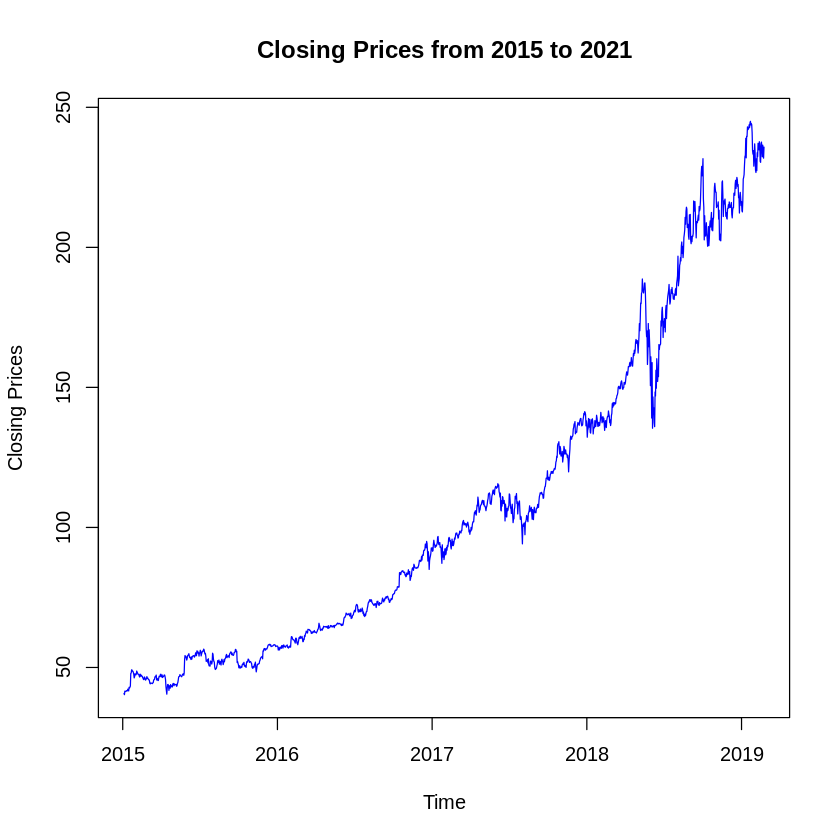

In [ ]:
plot(close.ts, type='l', col='blue', ylab="Closing Prices", main="Closing Prices from 2015 to 2021")

We can clearly observe that the time series for closing prices is non-stationary. Hence we make it stationary.

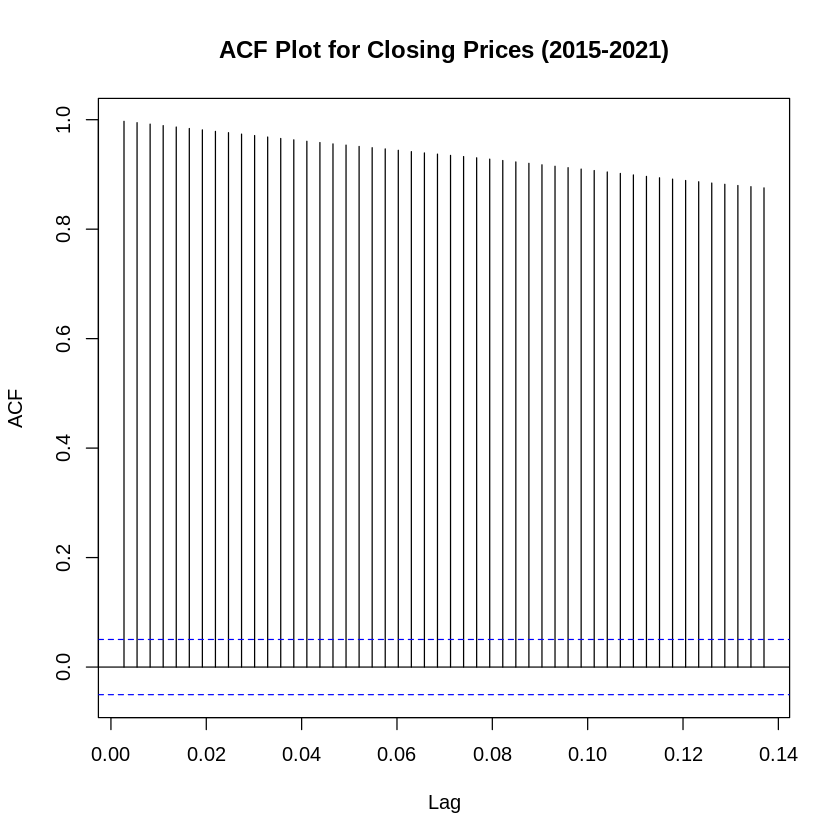

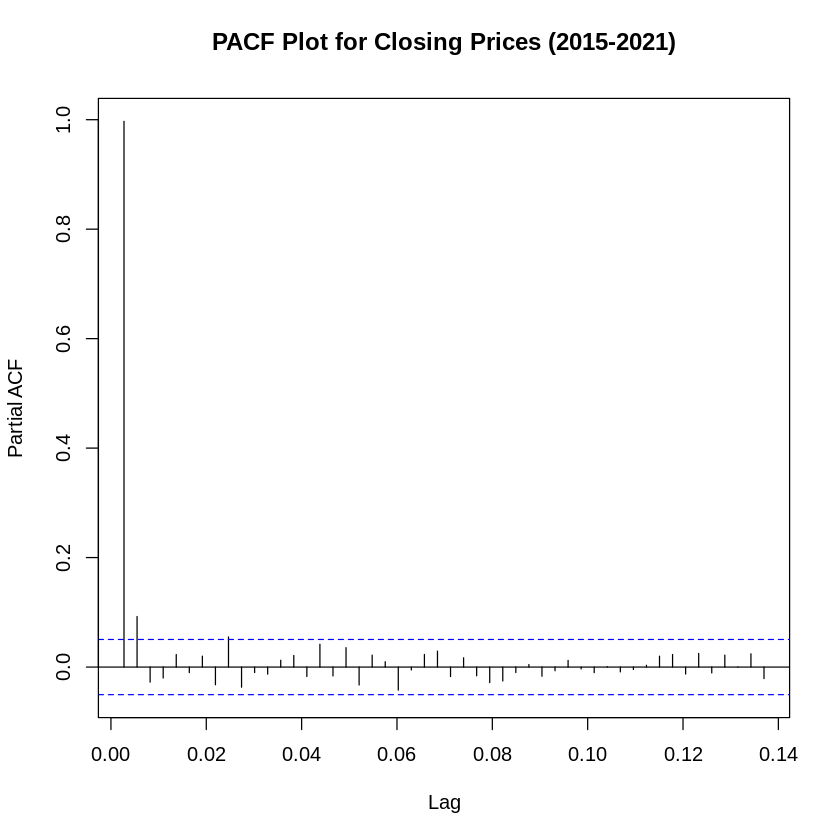

In [ ]:
acf(close.ts, main="ACF Plot for Closing Prices (2015-2021)", lag.max=50)
pacf(close.ts, main="PACF Plot for Closing Prices (2015-2021)", lag.max=50)

The above two are the ACF and PACF plots of the time series. We can clearly conclude from ACF plot that the series is non-stationary.

# Augmented Dickey-Fuller Test (CADF)

In [ ]:
CADFtest(close.ts, type='none', max.lag.y=10)


	ADF test

data:  close.ts
ADF(10) = 2.9275, p-value = 0.9993
alternative hypothesis: true delta is less than 0
sample estimates:
      delta 
0.001436682 


The CADF test proves with 99% confidence that the series is non-stationary. Therefore, we make it stationary by differencing or transforming or a combination of both.

# Differencing (Making Stationary)

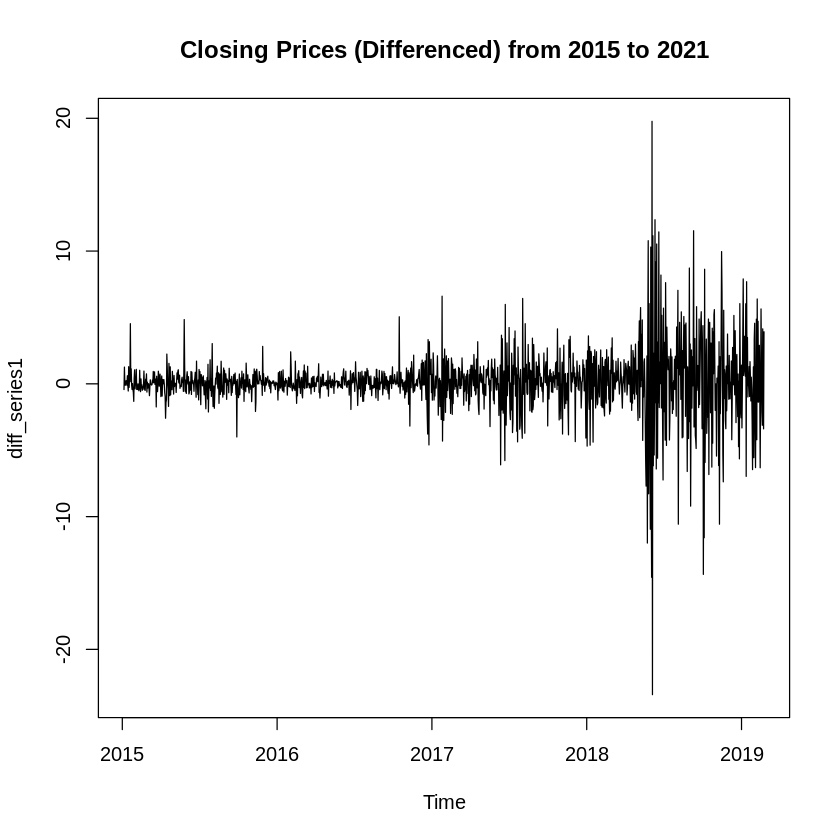

In [ ]:
diff_series1 = diff(close.ts)
plot(diff_series1, type='l', main="Closing Prices (Differenced) from 2015 to 2021")

We can observe that there is changing variance. So we can choose GARCH model as well.

In [ ]:
CADFtest(diff_series1, type='none')


	ADF test

data:  diff_series1
ADF(1) = -30.708, p-value < 2.2e-16
alternative hypothesis: true delta is less than 0
sample estimates:
   delta 
-1.26203 


The CADF test for differenced series proves that the p-value is almost 0 < 0.05. Thus, we reject Null Hypothesis (H0). Therefore, we can conclude that the series is now stationary.

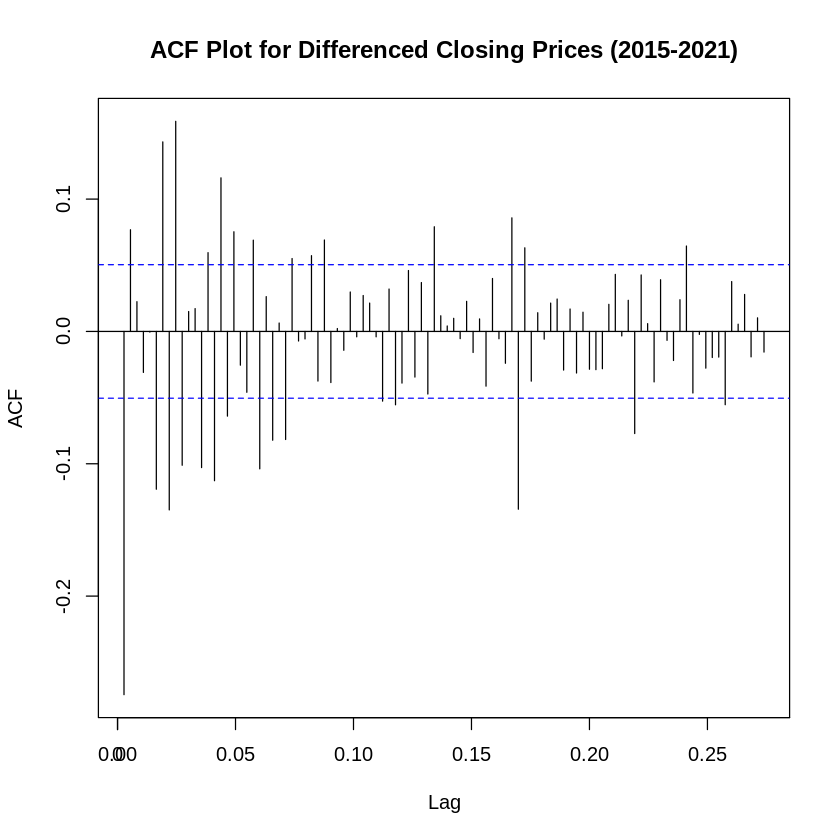

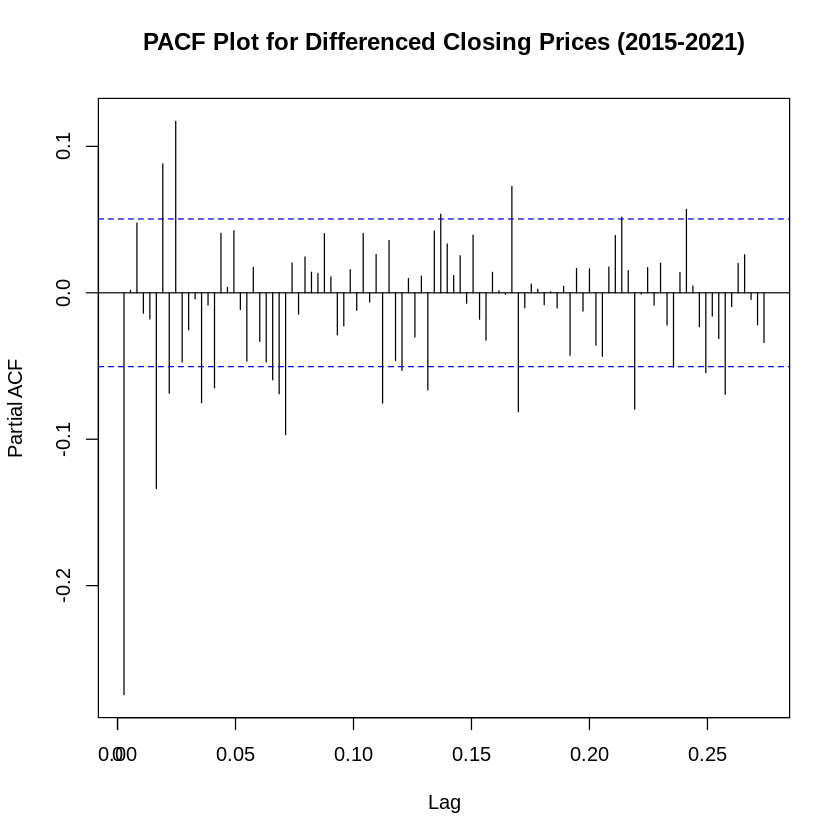

In [ ]:
acf(diff_series1, main="ACF Plot for Differenced Closing Prices (2015-2021)", lag.max=100)
axis(1, at=seq(0,50,2))
pacf(diff_series1, main="PACF Plot for Differenced Closing Prices (2015-2021)", lag.max=100)
axis(1, at=seq(0,50,2))

In [ ]:
eacf(diff_series1)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o x x x x x o  o  x  x 
1 o x x o o x o o x x o  o  x  o 
2 o x o o o x x o o o o  o  x  o 
3 x x o o o x o o o o o  o  x  o 
4 x o x o x o o o o o o  o  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x o x x x x x o o o o  o  x  o 
7 x x x x x x o o o x o  o  o  o 


# Modeling

We can estimate the candidate models as ARIMA(0,1,2), ARIMA(3,1,2), ARIMA(0,1,1), ARIMA(3,1,1).

In [ ]:
IMA11 = Arima(close.ts, order = c(0,1,1), method="ML")
IMA11

Series: close.ts 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.2455
s.e.   0.0229

sigma^2 = 5.198:  log likelihood = -3386.64
AIC=6777.29   AICc=6777.3   BIC=6787.93

In [ ]:
ARIMA311 = Arima(close.ts, order = c(3,1,1), method="ML")
ARIMA311

Series: close.ts 
ARIMA(3,1,1) 

Coefficients:
          ar1      ar2     ar3     ma1
      -1.1139  -0.2026  0.0708  0.8573
s.e.   0.0473   0.0402  0.0268  0.0404

sigma^2 = 5.092:  log likelihood = -3369.56
AIC=6749.12   AICc=6749.16   BIC=6775.72

In [ ]:
IMA12 = Arima(close.ts, order = c(0,1,2), method="ML")
IMA12

Series: close.ts 
ARIMA(0,1,2) 

Coefficients:
          ma1     ma2
      -0.2716  0.1050
s.e.   0.0256  0.0273

sigma^2 = 5.152:  log likelihood = -3379.32
AIC=6764.64   AICc=6764.65   BIC=6780.6

In [ ]:
ARIMA312 = Arima(close.ts, order = c(3,1,2), method="ML")
ARIMA312

Series: close.ts 
ARIMA(3,1,2) 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      0.1659  -0.8614  -0.2387  -0.4441  0.9999
s.e.  0.0251   0.0126   0.0252   0.0020  0.0055

sigma^2 = 5.057:  log likelihood = -3366.77
AIC=6745.55   AICc=6745.6   BIC=6777.46

AIC Summary:

1. IMA(1,1) - AIC=6777.29
2. ARIMA(3,1,1) - AIC=6749.12
3. IMA(1,2) - AIC=6764.64
4. **ARIMA(3,1,2) - AIC=6745.55**

From the above models, the ARIMA(3,1,2) model performs
the best.

# Diagnostics

Residual Analysis

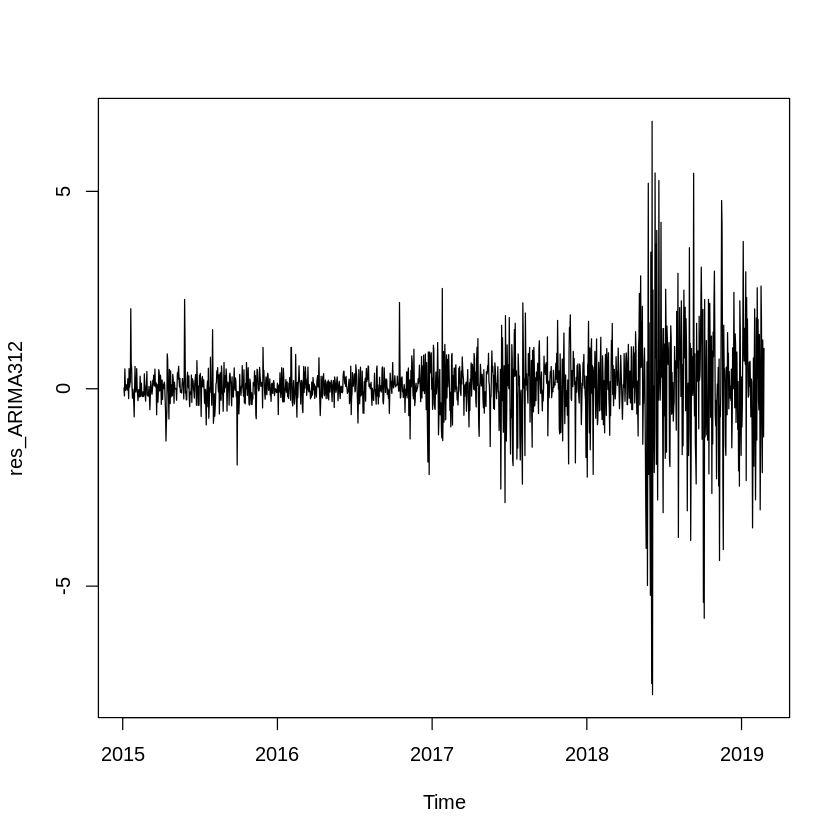

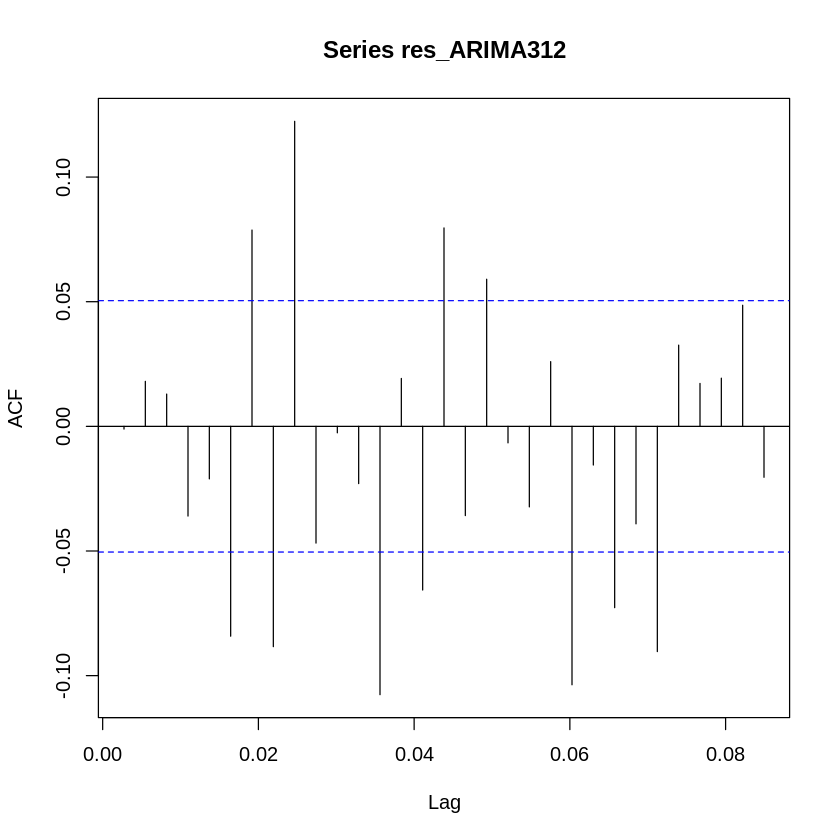

In [ ]:
res_ARIMA312 = rstandard(ARIMA312)
plot(res_ARIMA312)
# plot(ma_series)
acf(res_ARIMA312)

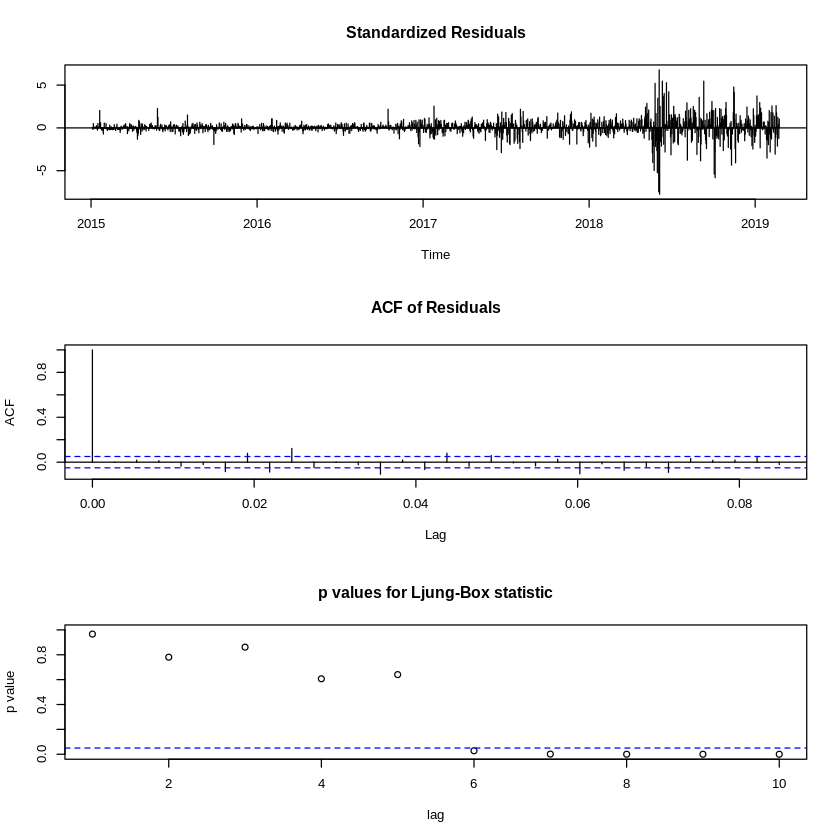

In [ ]:
tsdiag(ARIMA312, gof=10, omit.initial = F, lwd=2)

From the results of the tsdiag function, we can say that since certain p-values are less than 0, the model is not good for the data.

Normality Check

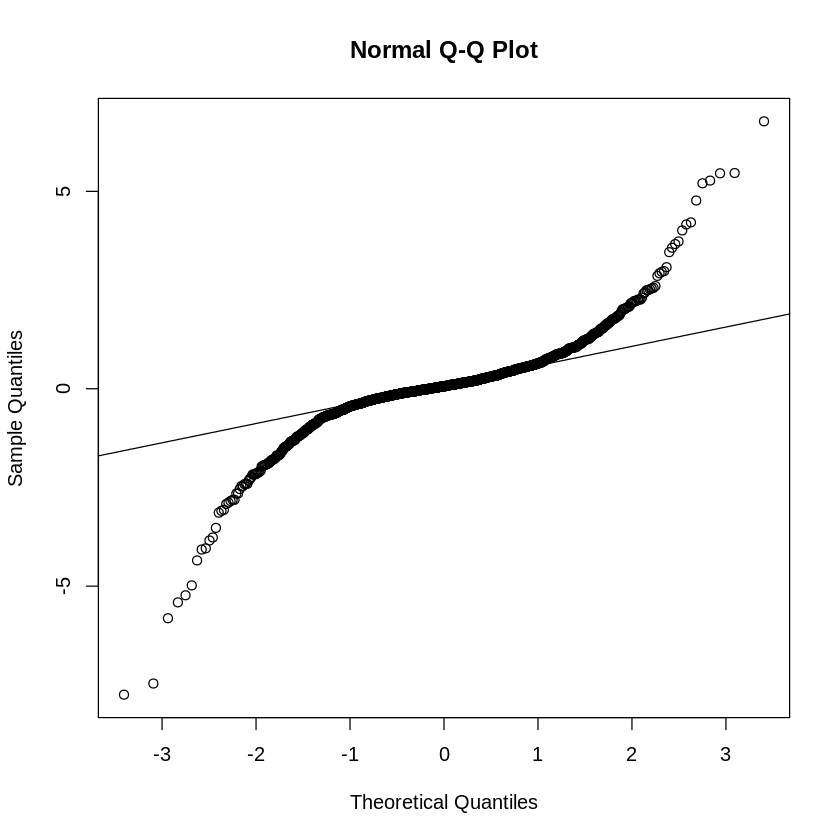

In [ ]:
qqnorm(res_ARIMA312)
qqline(res_ARIMA312)

Shapiro-Wilk Test:

H0: Residuals are normally distributed, H1: Residuals are not normally distributed

In [ ]:
shapiro.test(res_ARIMA312)


	Shapiro-Wilk normality test

data:  res_ARIMA312
W = 0.82777, p-value < 2.2e-16


We can observe from the Normality test that Residuals are not normally distributed.

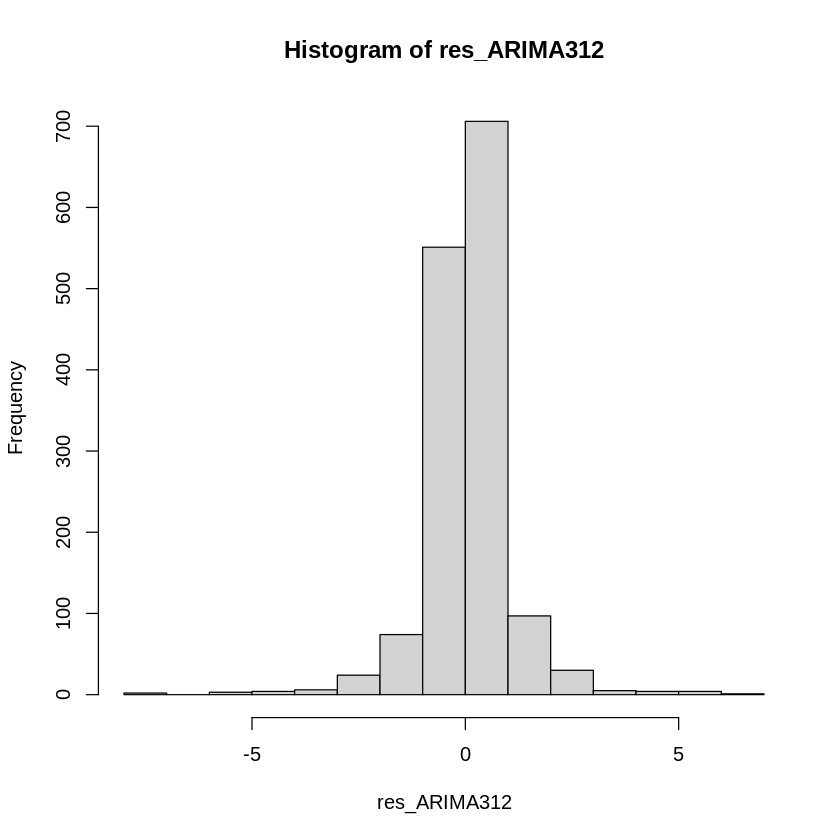

In [ ]:
hist(res_ARIMA312)

Ljung-Box Test

In [ ]:
LB.test(ARIMA312, lag=6)


	Box-Ljung test

data:  residuals from  ARIMA312
X-squared = 14.138, df = 1, p-value = 0.0001699


We can conclude from LB Test that the error terms are correlated as we reject H0.


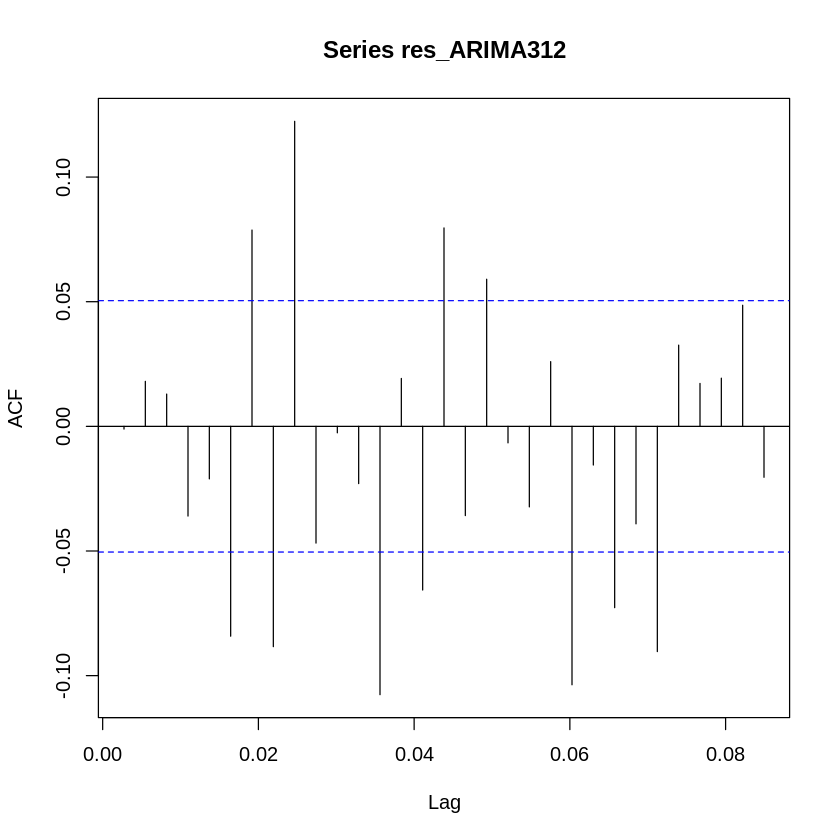

In [ ]:
acf(res_ARIMA312)

# Forecasting

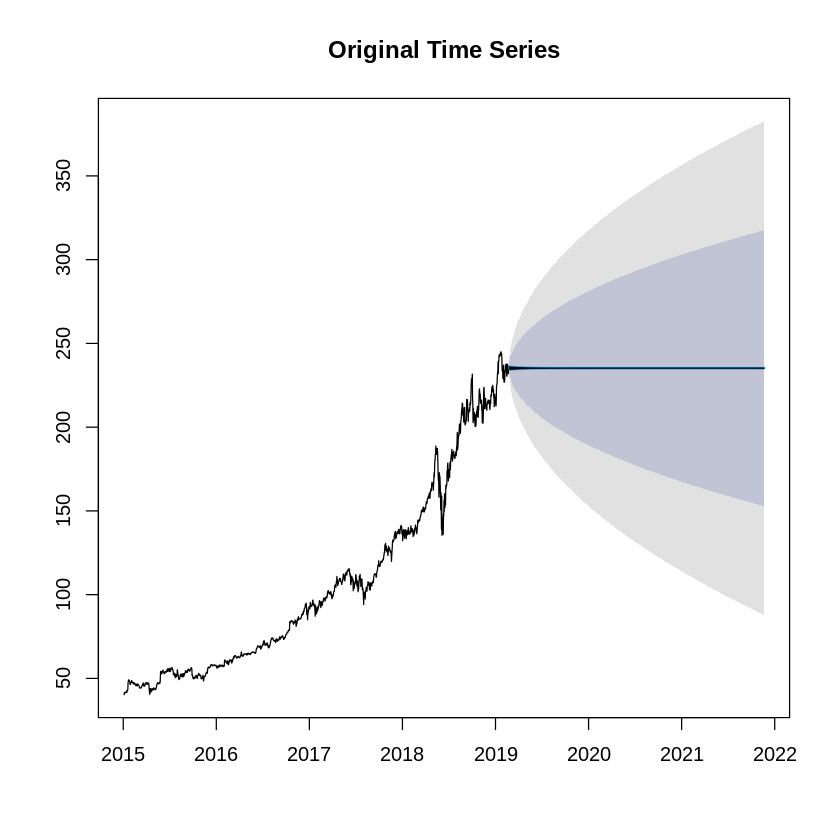

In [ ]:
fc.ARIMA312 = forecast(ARIMA312, h=1000, level=c(85,99))
predict_ARIMA312 = predict(fc.ARIMA312, n.ahead=20000)
plot(fc.ARIMA312, main="Original Time Series")
lines(predict_ARIMA312$mean)

From the forecast plot, we can say that, the forecast is approximately equal to mean and thus it is a straight line.

---



In [ ]:
# summary(fc.ARIMA312)

We will now try to fit a GARCH Model.

# GARCH Model

Taking Returns

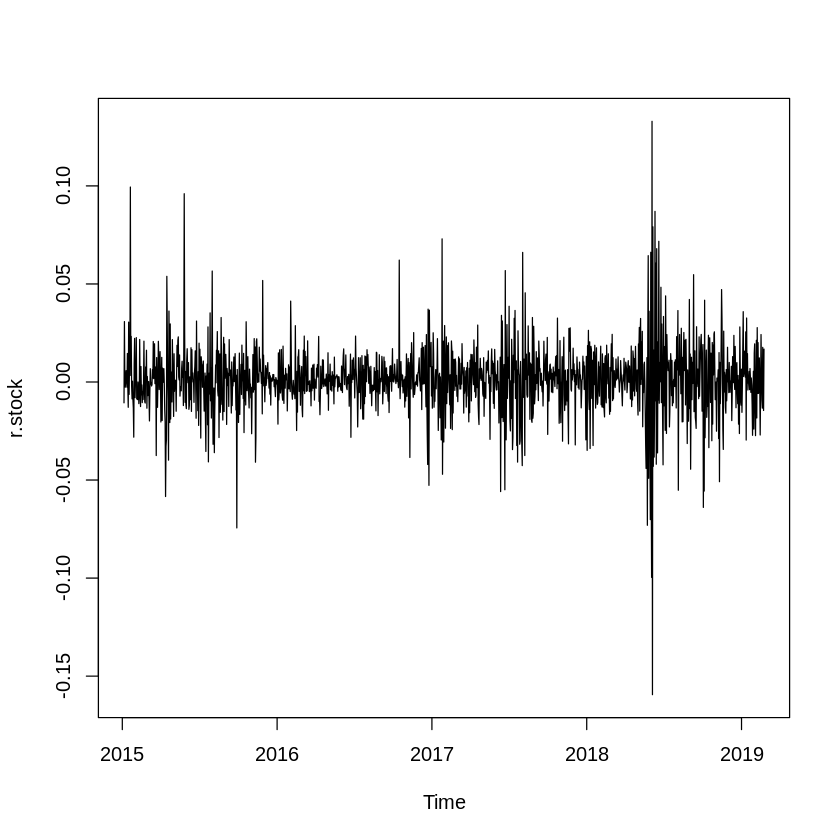

In [ ]:
r.stock = diff(log(close.ts))
plot(r.stock)

In [ ]:
# acf(r.stock, lag.max=100)
# pacf(r.stock, lag.max=100)

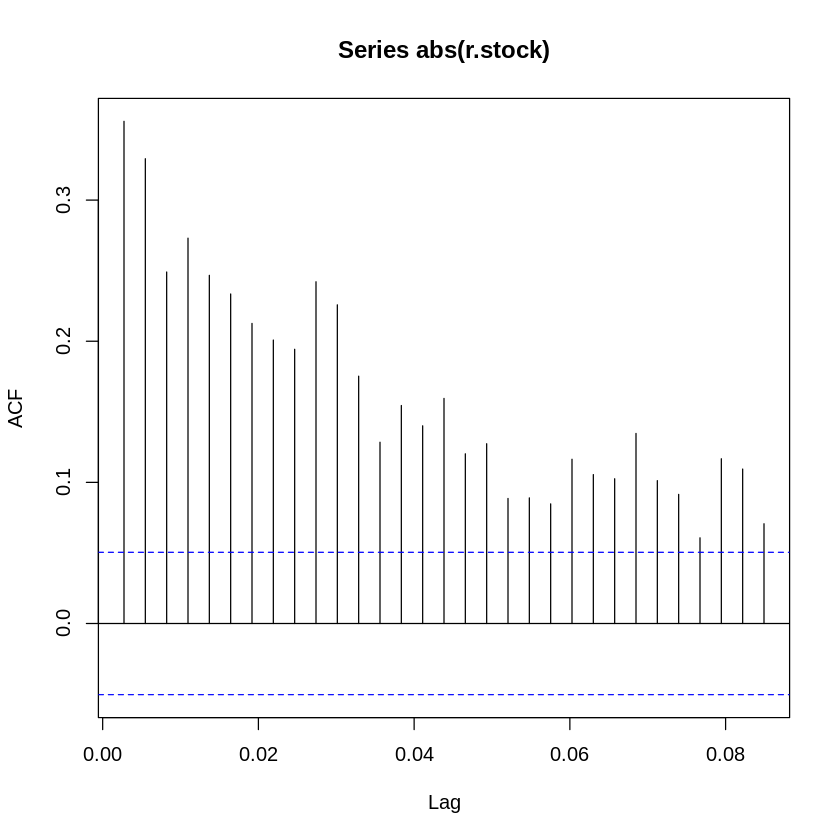

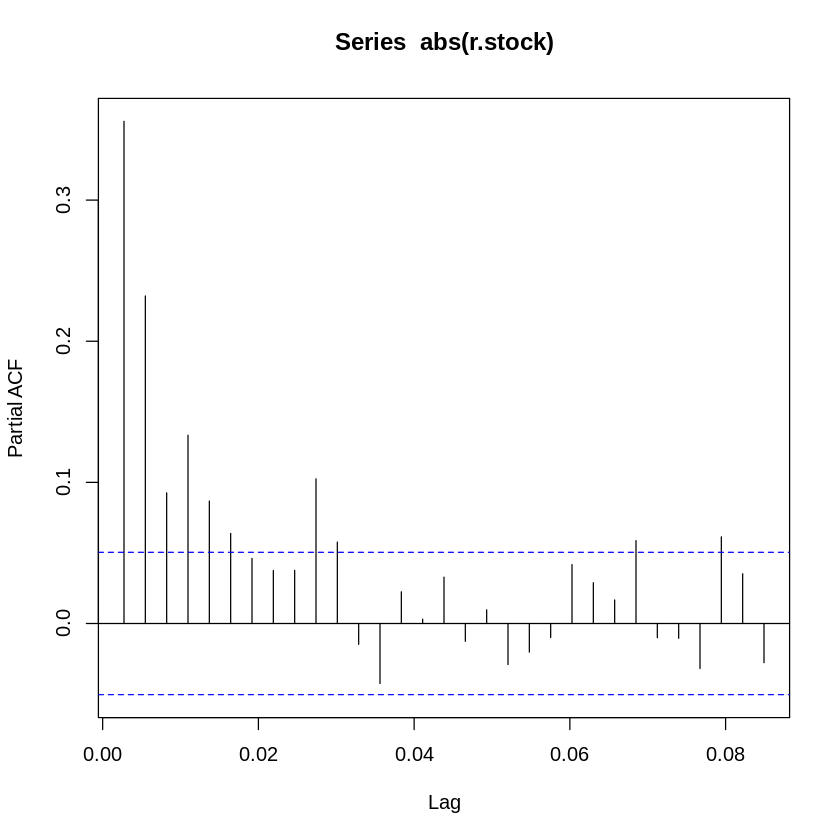

In [ ]:
acf(abs(r.stock))
pacf(abs(r.stock))

ACF and PACF of Squared Returns

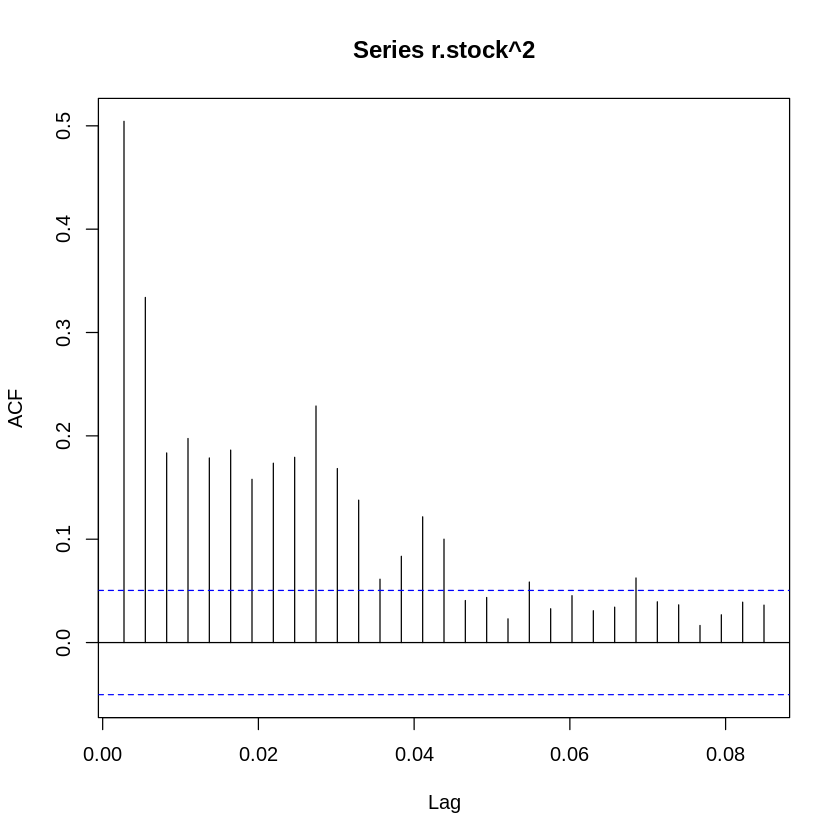

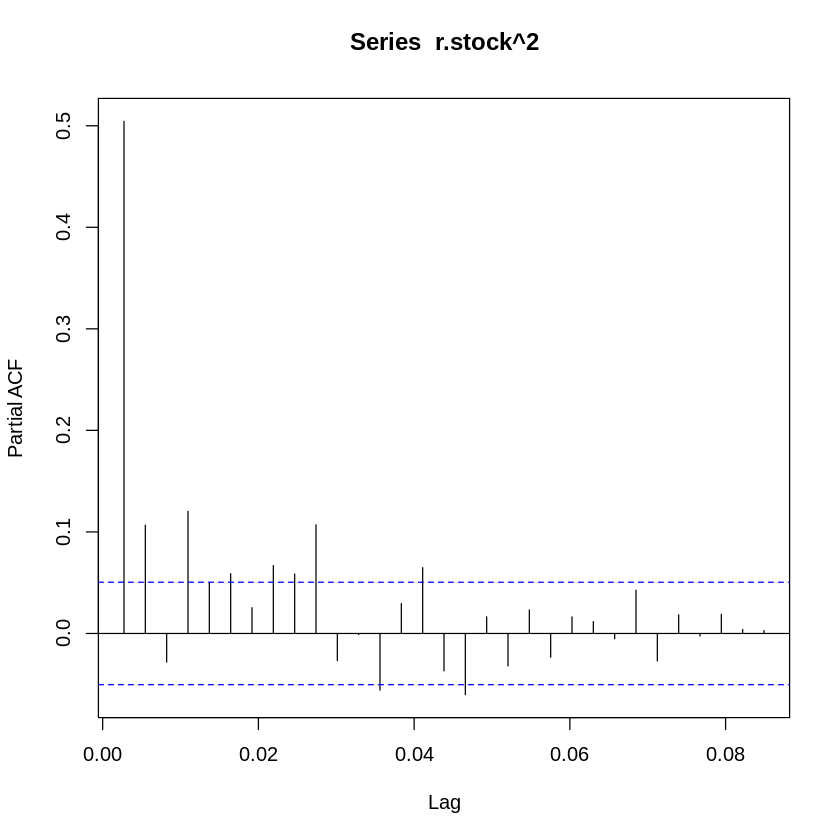

In [ ]:
acf(r.stock^2)
pacf(r.stock^2)

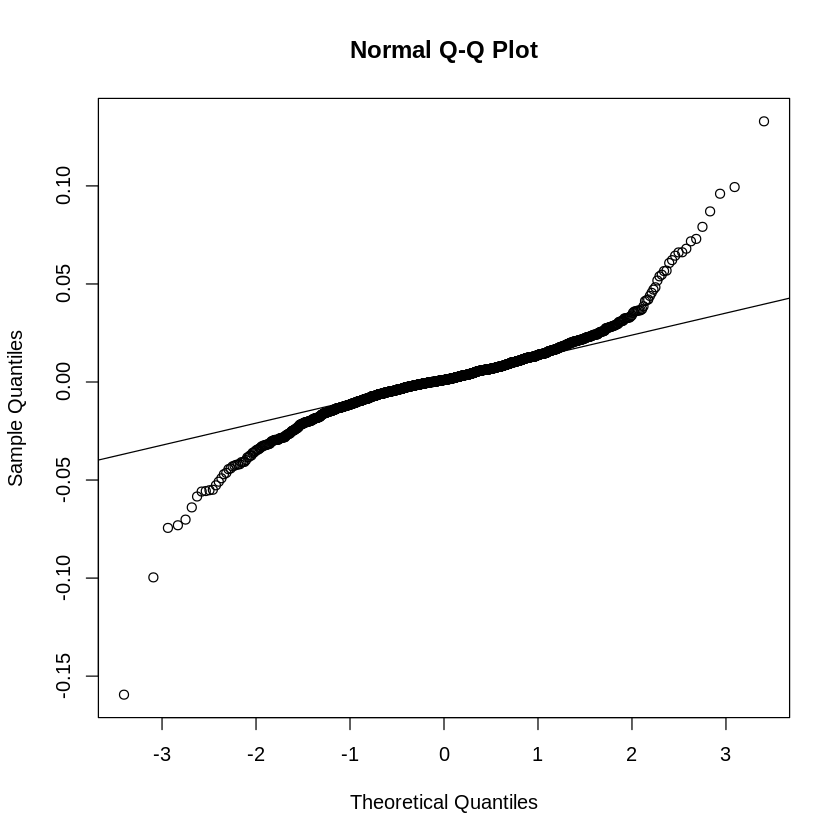

In [ ]:
qqnorm(r.stock)
qqline(r.stock)

In [ ]:
eacf(r.stock^2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  x  x  x 
1 x x x o o o o o o x o  x  x  o 
2 x x x x o o o o o x o  o  x  o 
3 x x x x o o o o o x x  o  x  o 
4 x x x x o o o o o x o  x  x  o 
5 x x x x x o o o o o o  x  x  o 
6 x x x x x x o o o o o  x  o  o 
7 x x x o x o o o o o o  x  o  o 


We can observe from the eacf matrix that the candidate garch models can be GARCH(1,3), GARCH(1,4), GARCH(4,4), GARCH(4,5), GARCH(5,5), GARCH(5,6).

In [ ]:
install.packages("rugarch")
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [ ]:
g13 = garch(r.stock, order=c(1,3))
summary(g13)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.428812e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.479e+03
     1    7 -5.496e+03  3.23e-03  4.88e-03  4.9e-04  1.1e+10  4.9e-05  2.69e+07
     2    8 -5.497e+03  5.28e-05  1.37e-04  3.4e-04  2.0e+00  4.9e-05  4.09e+01
     3    9 -5.497e+03  4.13e-05  4.47e-05  3.5e-04  2.0e+00  4.9e-05  3.95e+01
     4   15 -5.521e+03  4.44e-03  6.04e-03  2.7e-01  2.0e+00  5.1e-02  3.94e+01
     5   18 -5.536e+03  2.57e-03  2.31e-03  6.4e-01  1.9e+00  2.0e-01  3.61e-01
     6   20 -5.539e+03  5.94e-04  5.77e-04  7.3e-02  2.0e+00  4.0e-02  1.68e+03
     7   22 -5.546e+03  1.27e-03  1.22e-03  1.2e-01  2.0e+00  7.9e-02  1.20e+05
     8   24 -5.562e+03  2.86e-03  2.66e-03  1.8e-01  2.0


Call:
garch(x = r.stock, order = c(1, 3))

Model:
GARCH(1,3)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.76336 -0.40928  0.07543  0.62372  7.11874 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 5.303e-05   8.985e-06    5.903 3.58e-09 ***
a1 1.356e-01   2.067e-02    6.561 5.35e-11 ***
a2 6.174e-02   3.553e-02    1.738   0.0823 .  
a3 2.784e-08   2.968e-02    0.000   1.0000    
b1 5.734e-01   6.789e-02    8.446  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1518.6, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.10836, df = 1, p-value = 0.742


In [ ]:
aic_g13 = AIC(g13)
aic_g13

[1] -8356.245

In [ ]:
g14 = garch(r.stock, order=c(1,4))
summary(g14)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.277011e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00
     6     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.492e+03
     1    6 -5.494e+03  3.73e-04  1.07e-02  1.0e-03  5.9e+09  1.0e-04  3.15e+07
     2    7 -5.511e+03  3.25e-03  5.93e-03  5.0e-04  2.3e+00  5.0e-05  2.95e+01
     3    8 -5.512e+03  1.11e-04  8.06e-05  3.4e-04  2.0e+00  5.0e-05  3.45e+01
     4    9 -5.512e+03  2.33e-05  2.50e-05  3.4e-04  2.0e+00  5.0e-05  3.57e+01
     5   16 -5.550e+03  6.84e-03  1.21e-02  4.2e-01  2.0e+00  1.1e-01  3.54e+01
     6   17 -5.562e+03  2.18e-03  2.62e-03  2.8e-01  2.0e+00  1.1e-01  8.53e-01
     7   19 -5.574e+03  2.11e-03  5.71e-03  5.4e-01  2.0e+00  3.5e-01  1.04e+00
     8   27 -5.576


Call:
garch(x = r.stock, order = c(1, 4))

Model:
GARCH(1,4)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.92573 -0.41658  0.07162  0.62179  7.17272 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 4.705e-05   5.566e-06    8.452  < 2e-16 ***
a1 1.953e-01   2.248e-02    8.686  < 2e-16 ***
a2 1.440e-02   3.266e-02    0.441    0.659    
a3 1.117e-08   2.642e-02    0.000    1.000    
a4 1.507e-01   2.218e-02    6.795 1.08e-11 ***
b1 4.800e-01   4.988e-02    9.623  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1435.4, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.063155, df = 1, p-value = 0.8016


In [ ]:
aic_g14 = AIC(g14)
aic_g14

[1] -8388.332

In [ ]:
g44 = garch(r.stock, order=c(4,4))
summary(g44)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.821609e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00
     6     5.000000e-02     1.000e+00
     7     5.000000e-02     1.000e+00
     8     5.000000e-02     1.000e+00
     9     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.505e+03
     1    7 -5.526e+03  3.75e-03  5.07e-03  3.8e-04  2.0e+10  3.8e-05  5.02e+07
     2    8 -5.527e+03  1.01e-04  6.66e-04  2.5e-04  2.0e+00  3.8e-05  4.55e+01
     3    9 -5.528e+03  2.90e-04  3.62e-04  2.4e-04  2.0e+00  3.8e-05  3.94e+01
     4   10 -5.528e+03  1.19e-05  1.13e-05  2.5e-04  2.0e+00  3.8e-05  4.02e+01
     5   17 -5.566e+03  6.72e-03  1.23e-02  4.1e-01  2.0e+00  1.0e-01  4.01e+01
     6   18 -5.575e+03  1.71e-03  2.78e-03  2.7e-01  2.0e+00  1.


Call:
garch(x = r.stock, order = c(4, 4))

Model:
GARCH(4,4)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.99598 -0.41995  0.07645  0.62529  7.18422 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 5.425e-05   2.499e-05    2.171   0.0299 *  
a1 1.686e-01   2.197e-02    7.672 1.69e-14 ***
a2 6.621e-02   8.764e-02    0.755   0.4500    
a3 8.001e-10   6.846e-02    0.000   1.0000    
a4 7.940e-02   3.198e-02    2.482   0.0131 *  
b1 1.182e-01   4.931e-01    0.240   0.8106    
b2 8.741e-02   2.523e-01    0.346   0.7291    
b3 1.347e-01   2.112e-01    0.638   0.5236    
b4 1.177e-01   2.579e-01    0.457   0.6480    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1514.3, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 5.2048e-06, df = 1, p-value = 0.9982


In [ ]:
aic_g44 = AIC(g44)
aic_g44

[1] -8372.321

In [ ]:
g45 = garch(r.stock, order=c(4,5))
summary(g45)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.669808e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00
     6     5.000000e-02     1.000e+00
     7     5.000000e-02     1.000e+00
     8     5.000000e-02     1.000e+00
     9     5.000000e-02     1.000e+00
    10     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.518e+03
     1    7 -5.538e+03  3.60e-03  4.71e-03  3.4e-04  2.3e+10  3.4e-05  5.38e+07
     2    8 -5.538e+03  9.33e-05  8.96e-04  2.8e-04  2.0e+00  3.4e-05  3.57e+01
     3    9 -5.541e+03  4.23e-04  5.58e-04  2.1e-04  2.0e+00  3.4e-05  2.97e+01
     4   10 -5.541e+03  1.89e-05  1.70e-05  2.3e-04  2.0e+00  3.4e-05  3.06e+01
     5   17 -5.570e+03  5.17e-03  9.42e-03  3.8e-01  2.0e+00  9.0e-02  3.06e+01
     6   18 -5.573e+03  6.


Call:
garch(x = r.stock, order = c(4, 5))

Model:
GARCH(4,5)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.94003 -0.42301  0.07441  0.63617  7.13907 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 7.265e-05   5.345e-05    1.359   0.1741    
a1 1.629e-01   2.184e-02    7.461 8.59e-14 ***
a2 7.032e-02   1.699e-01    0.414   0.6790    
a3 8.689e-04   4.013e-02    0.022   0.9827    
a4 8.543e-02   3.290e-02    2.597   0.0094 ** 
a5 6.044e-02   9.565e-02    0.632   0.5274    
b1 1.058e-01   1.037e+00    0.102   0.9187    
b2 7.601e-02   6.292e-01    0.121   0.9039    
b3 1.287e-01   3.396e-01    0.379   0.7048    
b4 1.040e-06   2.656e-01    0.000   1.0000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1338, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.010276, df = 1, p-value = 0.9193


In [ ]:
aic_g45 = AIC(g45)
aic_g45

[1] -8367.33

In [ ]:
g55 = garch(r.stock, order=c(5,5))
summary(g55)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.518007e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00
     6     5.000000e-02     1.000e+00
     7     5.000000e-02     1.000e+00
     8     5.000000e-02     1.000e+00
     9     5.000000e-02     1.000e+00
    10     5.000000e-02     1.000e+00
    11     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.521e+03
     1    7 -5.539e+03  3.21e-03  4.02e-03  2.7e-04  3.0e+10  2.7e-05  6.11e+07
     2    8 -5.542e+03  5.53e-04  1.29e-03  2.7e-04  2.2e+00  2.7e-05  3.59e+01
     3    9 -5.544e+03  2.33e-04  3.25e-04  1.7e-04  2.0e+00  2.7e-05  2.81e+01
     4   10 -5.544e+03  1.76e-05  1.61e-05  1.9e-04  2.0e+00  2.7e-05  2.91e+01
     5   17 -5.569e+03  4.62e-03  8.44e-03  3.6e-01  2.0e+00  8.3e-0


Call:
garch(x = r.stock, order = c(5, 5))

Model:
GARCH(5,5)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.93476 -0.42095  0.07415  0.63815  7.14848 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 8.350e-05   4.302e-05    1.941  0.05226 .  
a1 1.546e-01   2.146e-02    7.206 5.78e-13 ***
a2 7.428e-02   1.406e-01    0.528  0.59726    
a3 1.192e-02   5.242e-02    0.227  0.82007    
a4 9.911e-02   3.149e-02    3.148  0.00165 ** 
a5 7.606e-02   7.941e-02    0.958  0.33817    
b1 6.828e-02   9.131e-01    0.075  0.94039    
b2 4.704e-02   7.247e-01    0.065  0.94825    
b3 7.026e-02   3.654e-01    0.192  0.84751    
b4 4.013e-07   3.052e-01    0.000  1.00000    
b5 3.760e-02   1.615e-01    0.233  0.81588    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1317.8, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.041016, df = 1, p-value = 0

In [ ]:
aic_g55 = AIC(g55)
aic_g55

[1] -8363.801

In [ ]:
g56 = garch(r.stock, order=c(5,6))
summary(g56)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.366207e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00
     6     5.000000e-02     1.000e+00
     7     5.000000e-02     1.000e+00
     8     5.000000e-02     1.000e+00
     9     5.000000e-02     1.000e+00
    10     5.000000e-02     1.000e+00
    11     5.000000e-02     1.000e+00
    12     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.526e+03
     1    7 -5.538e+03  2.14e-03  2.57e-03  1.9e-04  4.1e+10  1.9e-05  5.29e+07
     2    8 -5.543e+03  9.23e-04  1.17e-03  1.9e-04  2.7e+00  1.9e-05  2.40e+01
     3    9 -5.543e+03  2.94e-06  3.47e-06  1.4e-04  2.0e+00  1.9e-05  1.94e+01
     4   16 -5.563e+03  3.60e-03  6.33e-03  3.6e-01  2.0e+00  7.6e-02  1.92e+01
     5   17 -5.571e+03  1.51e-

Warning message in garch(r.stock, order = c(5, 6)):
“singular information”



Call:
garch(x = r.stock, order = c(5, 6))

Model:
GARCH(5,6)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.99936 -0.42105  0.07273  0.63254  7.22188 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)
a0 8.151e-05          NA       NA       NA
a1 1.457e-01          NA       NA       NA
a2 8.940e-02          NA       NA       NA
a3 4.012e-02          NA       NA       NA
a4 8.896e-02          NA       NA       NA
a5 6.903e-02          NA       NA       NA
a6 1.626e-16          NA       NA       NA
b1 4.909e-02          NA       NA       NA
b2 4.365e-02          NA       NA       NA
b3 4.327e-02          NA       NA       NA
b4 4.149e-02          NA       NA       NA
b5 4.300e-02          NA       NA       NA

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1475.8, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.057063, df = 1, p-value = 0.8112


In [ ]:
aic_g56 = AIC(g56)
aic_g56

[1] -8354.543

GARCH AIC Summary:

1. g13 - AIC= -8356.24524783963
2. **g14 - AIC= -8388.33188779398**
3. **g44 - AIC= -8372.32109825021**
4. g45 - AIC= -8367.32996503744
5. g55 - AIC= -8363.80115656204
6. g56 - AIC= -8354.54341589285

From all the above candidate models, we can conclude that GARCH(4,4) and GARCH(1,4) have lower AIC scores as compared with others. Thus, we can consider either GARCH(4,4) or GARCH(1,4) to be the best fit for the data.

Residual Analysis

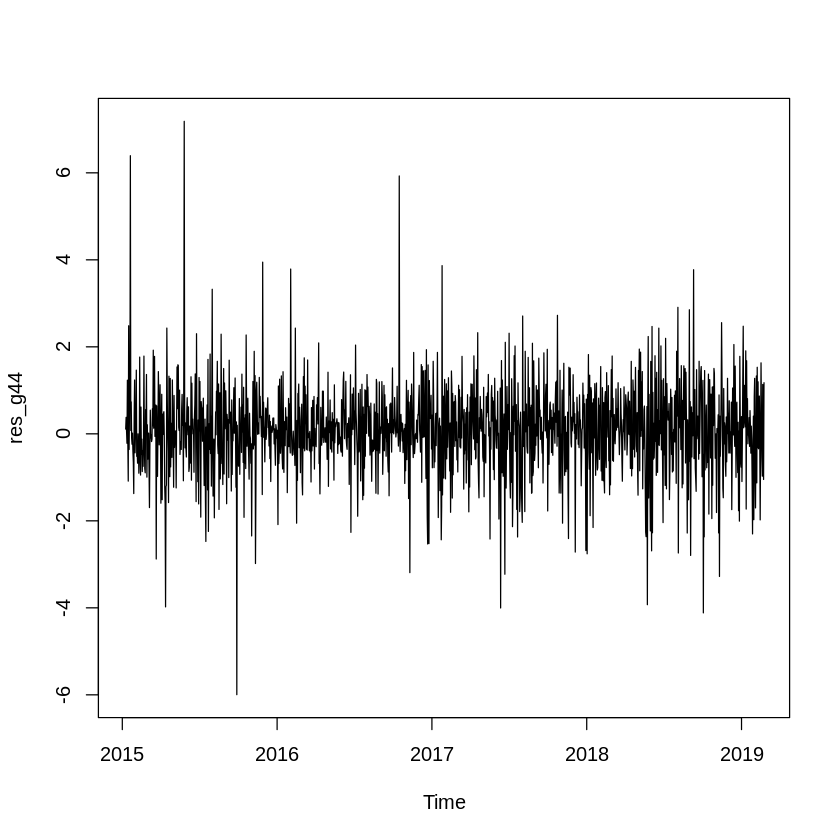

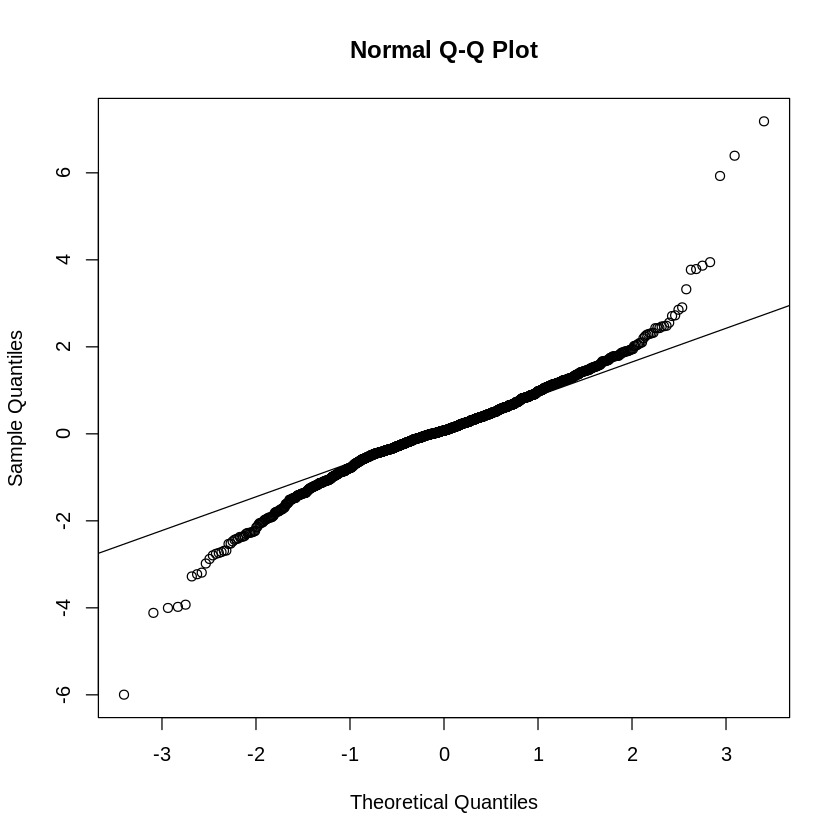

In [ ]:
res_g44 = residuals(g44)
plot(res_g44)
qqnorm(res_g44)
qqline(res_g44)

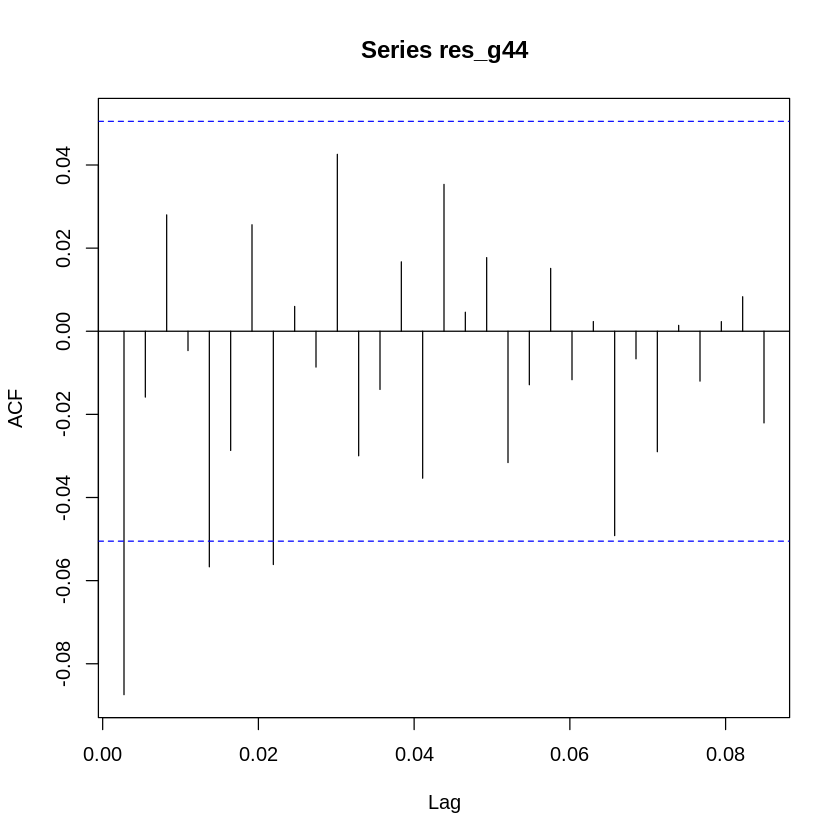

In [ ]:
acf(res_g44, na.action = na.omit)

From the ACF plot of residuals, we can say that almost all the residuals lie within the confidence interval except the first significant lag.

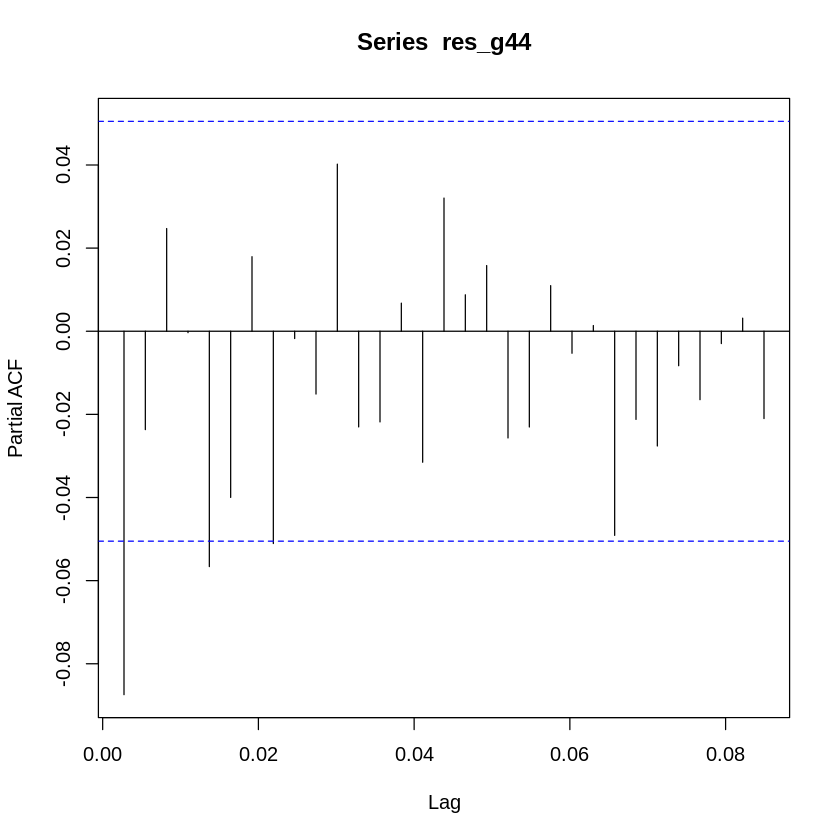

In [ ]:
pacf(res_g44, na.action = na.omit)

Ljung-Box Test

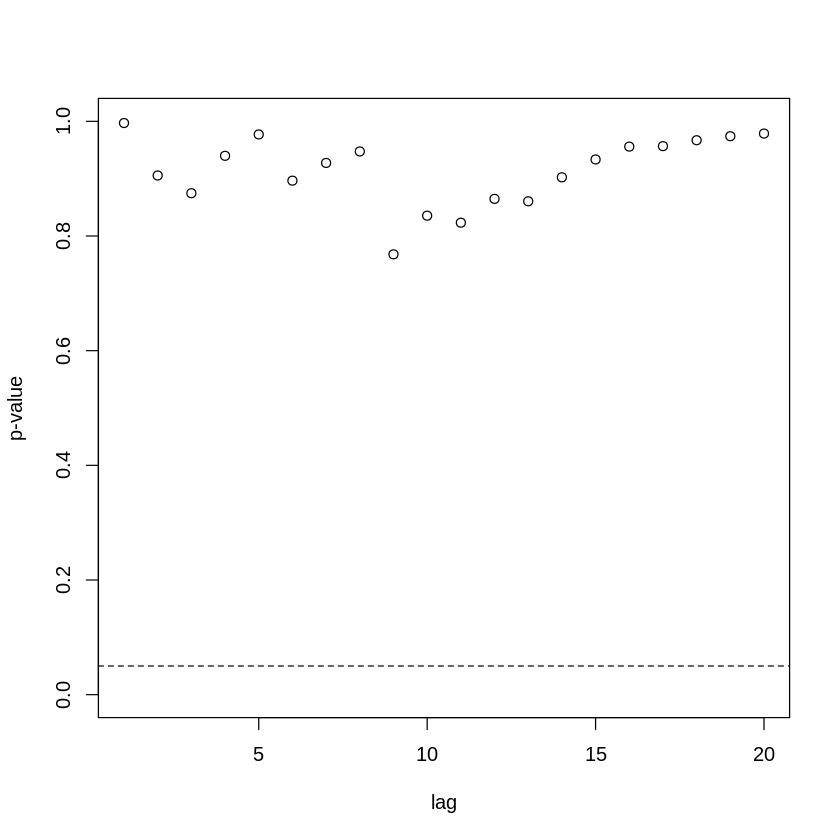

In [ ]:
gBox(g44, method="squared")

From the LB test results, since all the p-values lie above 0.5, we can conclude that the model is a good fit for the data.



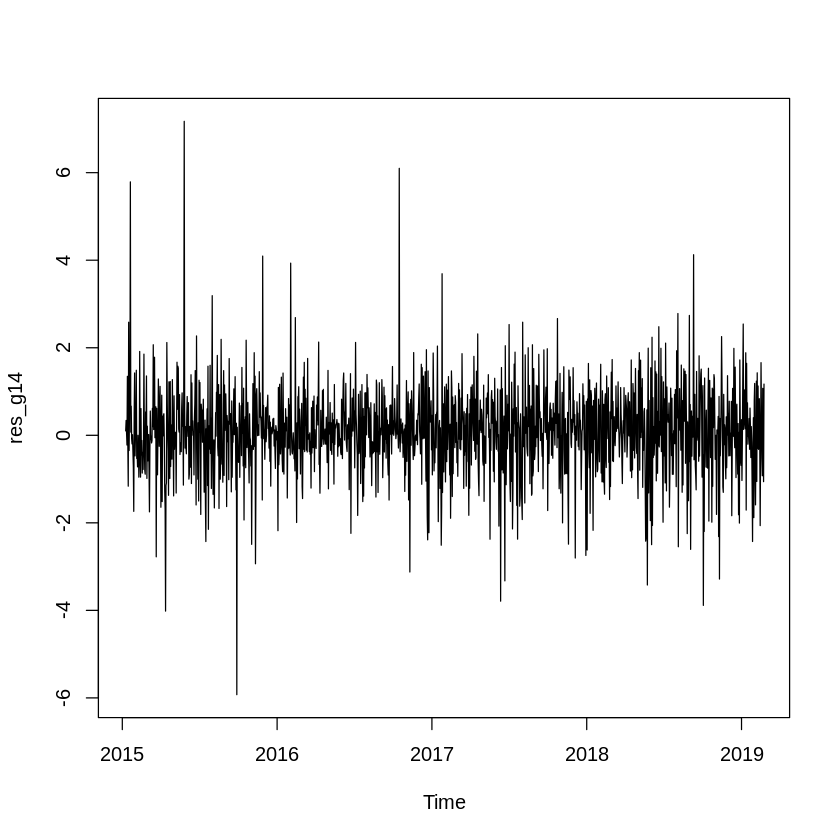

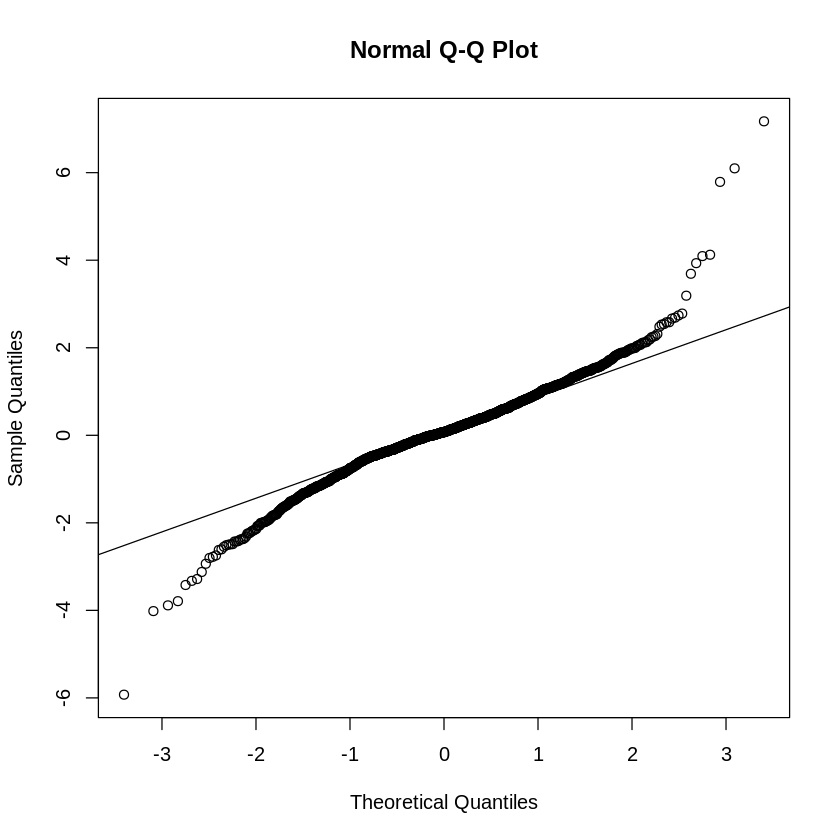

In [ ]:
res_g14 = residuals(g14)
plot(res_g14)
qqnorm(res_g14)
qqline(res_g14)

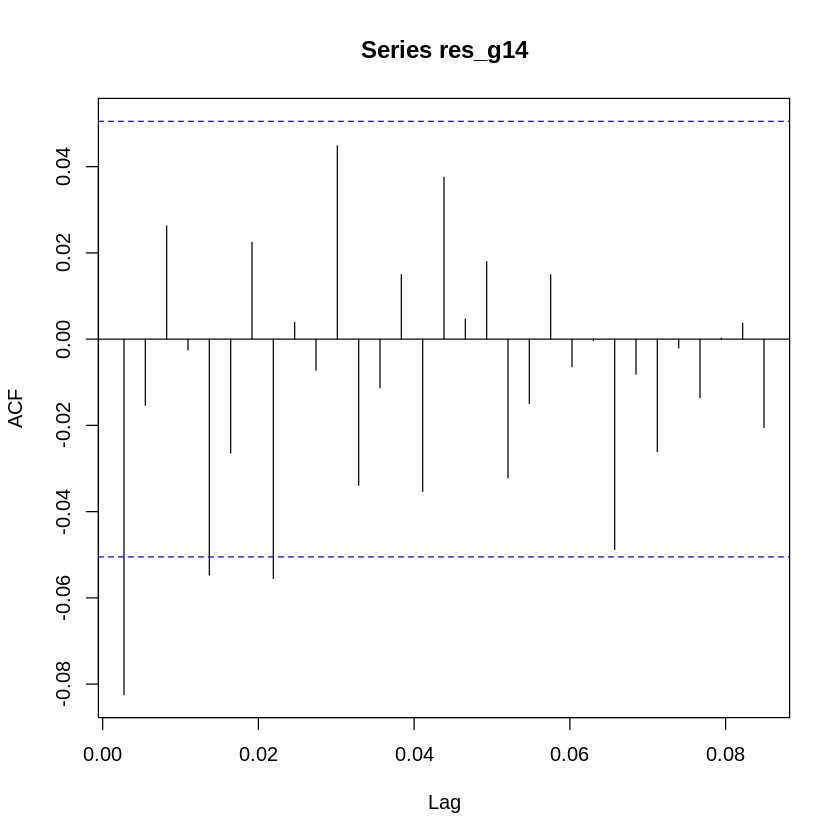

In [ ]:
acf(res_g14, na.action = na.omit)

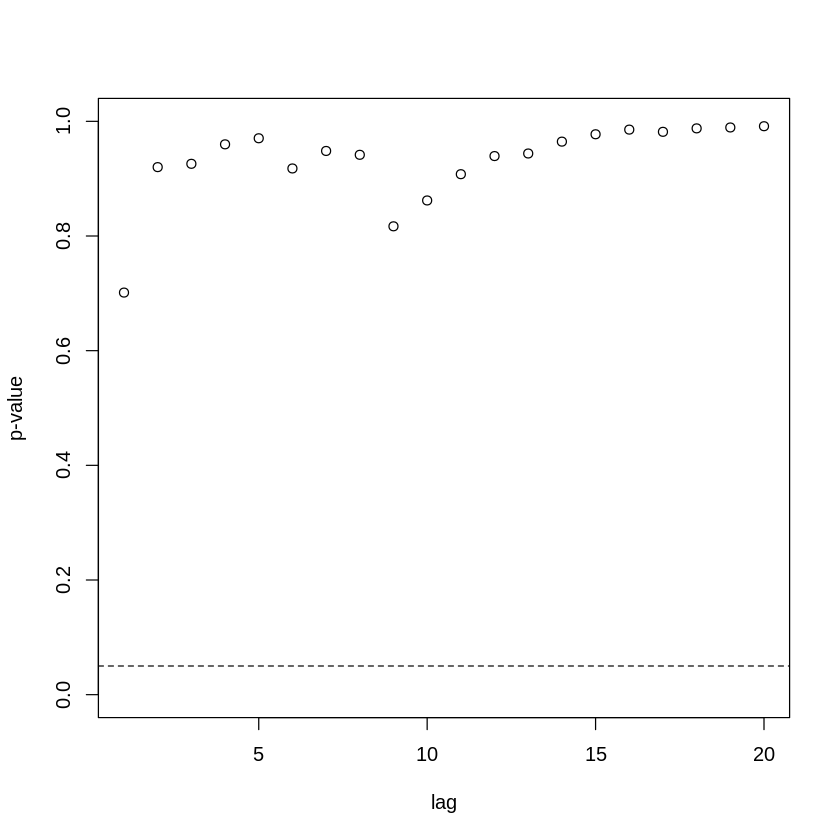

In [ ]:
gBox(g14, method="squared")

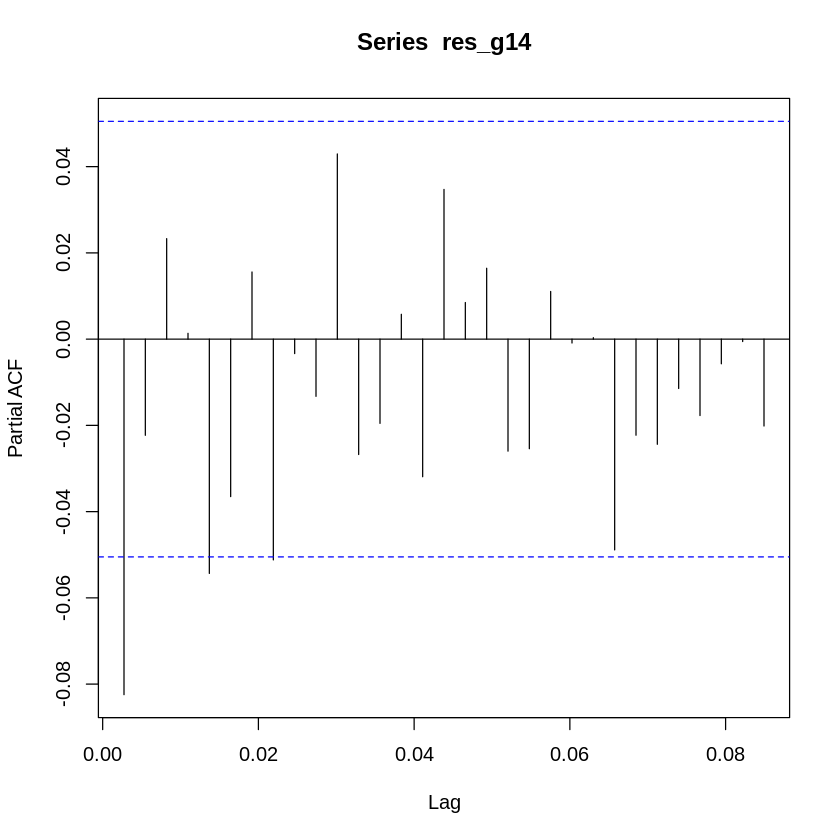

In [ ]:
pacf(res_g14, na.action = na.omit)

In [ ]:
g14_forecast = predict(g14, n.ahead = 1000)
print(summary(g14_forecast))

       V1                 V2           
 Min.   :0.009686   Min.   :-0.092015  
 1st Qu.:0.011630   1st Qu.:-0.017077  
 Median :0.013559   Median :-0.013559  
 Mean   :0.015748   Mean   :-0.015748  
 3rd Qu.:0.017077   3rd Qu.:-0.011630  
 Max.   :0.092015   Max.   :-0.009686  
 NA's   :4          NA's   :4          


Forecasting GARCH Model

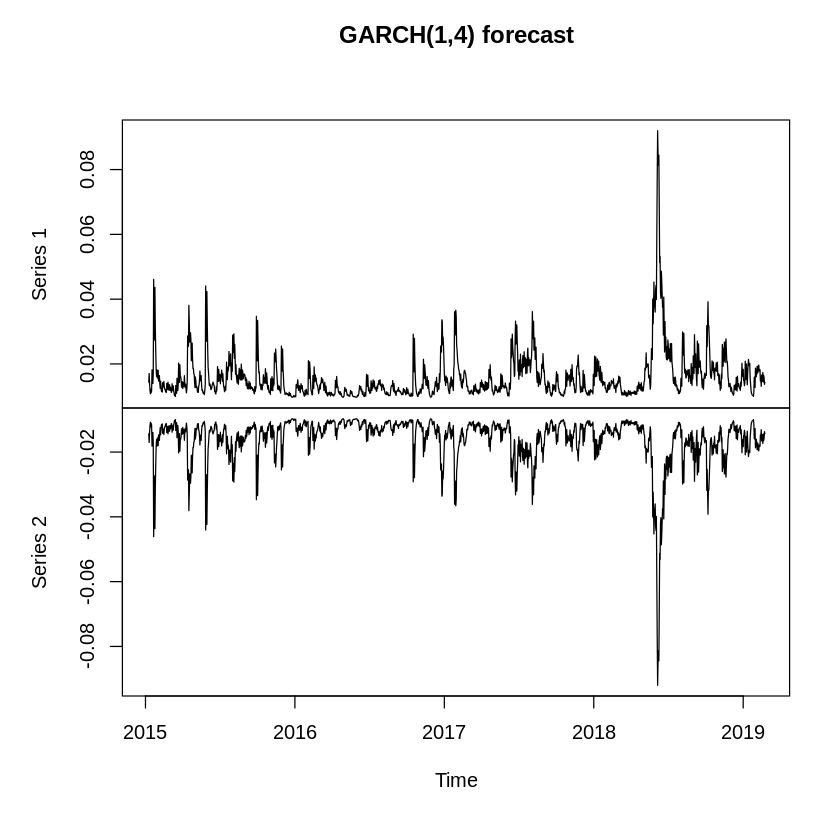

In [ ]:
plot(g14_forecast, main="GARCH(1,4) forecast")

We can observe from the variance forecast plot of g14 model that the variance almost resembles the original data and thus fits the data correctly well.

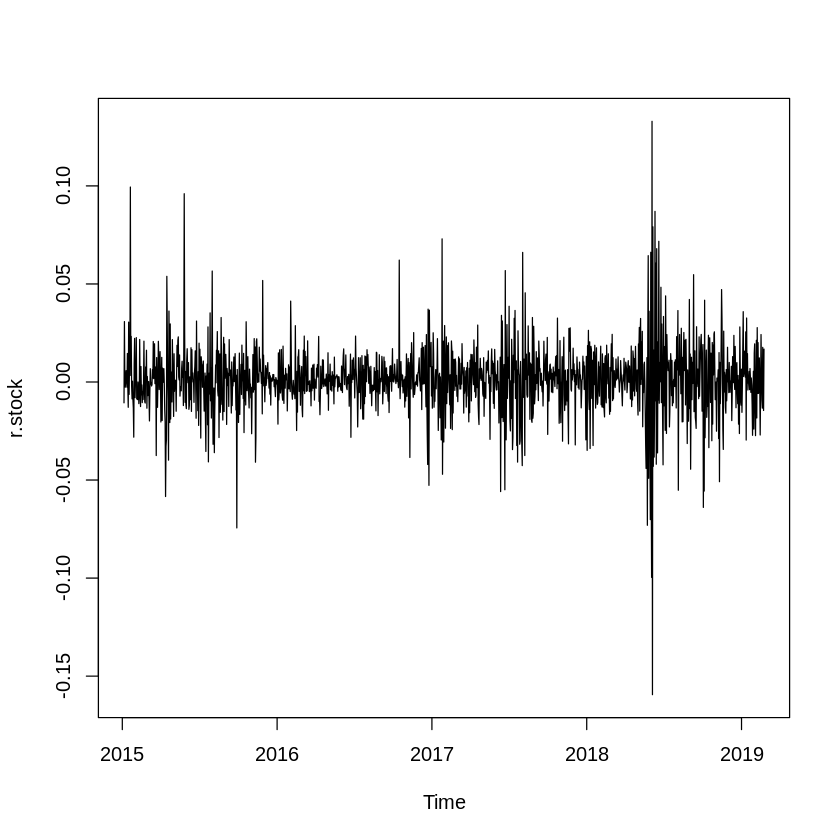

In [ ]:
plot(r.stock)

In [ ]:
g44_forecast = predict(g44, n.ahead = 10000)
print(summary(g44_forecast))
# g44_forecast

       V1                V2          
 Min.   :0.01019   Min.   :-0.08308  
 1st Qu.:0.01196   1st Qu.:-0.01658  
 Median :0.01354   Median :-0.01354  
 Mean   :0.01540   Mean   :-0.01540  
 3rd Qu.:0.01658   3rd Qu.:-0.01196  
 Max.   :0.08308   Max.   :-0.01019  
 NA's   :4         NA's   :4         


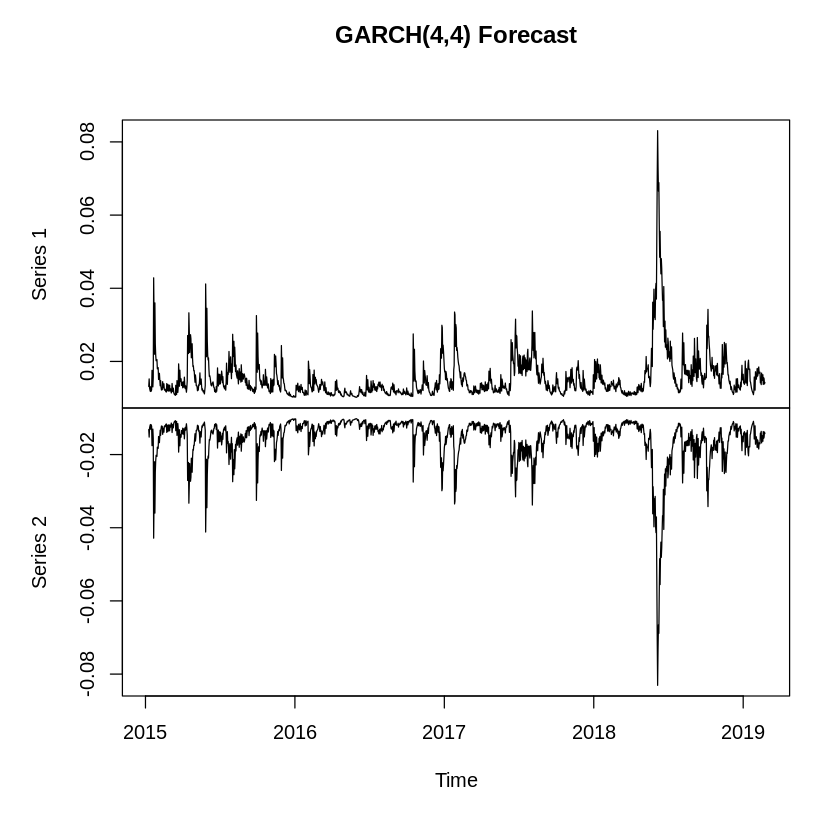

In [ ]:
plot(g44_forecast, main = "GARCH(4,4) Forecast")

# Conclusion

From the gBox plots of GARCH(1,4) and GARCH(4,4), considering the lowest AIC score for GARCH(1,4) model and according to '*Principle of Parsimony*'- Model with the lower number of parameters, GARCH(1,4) is the best fit for the data.

#US Regional Sales Prediction (Non-Seasonal)

In [ ]:
us_sales = read.table('US_Regional_Sales_Data.csv', header=TRUE, sep=',')
head(us_sales)
# tail(us_sales)

,OrderNumber,Sales.Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,X_SalesTeamID,X_CustomerID,X_StoreID,X_ProductID,Order.Quantity,Discount.Applied,Unit.Cost,Unit.Price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
2,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
3,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
4,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
5,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
6,SO - 000106,Online,WARE-PUJ1005,31/12/17,31/5/18,8/6/18,13/6/18,USD,12,21,285,1,5,0.050,446.56,"1,038.50"


In [ ]:
us_sales$OrderDate <- as.Date(us_sales$OrderDate, format = "%d/%m/%y")
# head(us_sales)

In [ ]:
us_sales$Unit.Price = trimws(us_sales$Unit.Price)
us_sales$Unit.Price <- as.numeric(gsub("[^0-9.]","", us_sales$Unit.Price))
# sum(is.na(us_sales$Unit.Price))
# unique(us_sales$Unit.Price)
head(us_sales)
tail(us_sales)

,OrderNumber,Sales.Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,X_SalesTeamID,X_CustomerID,X_StoreID,X_ProductID,Order.Quantity,Discount.Applied,Unit.Cost,Unit.Price
,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>
1,SO - 000101,In-Store,WARE-UHY1004,31/12/17,2018-05-31,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18",1963.1
2,SO - 000102,Online,WARE-NMK1003,31/12/17,2018-05-31,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66",3939.6
3,SO - 000103,Distributor,WARE-UHY1004,31/12/17,2018-05-31,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,1775.5
4,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,2018-05-31,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69",2324.9
5,SO - 000105,Distributor,WARE-NMK1003,10/4/18,2018-05-31,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14",1822.4
6,SO - 000106,Online,WARE-PUJ1005,31/12/17,2018-05-31,8/6/18,13/6/18,USD,12,21,285,1,5,0.050,446.56,1038.5


,OrderNumber,Sales.Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,X_SalesTeamID,X_CustomerID,X_StoreID,X_ProductID,Order.Quantity,Discount.Applied,Unit.Cost,Unit.Price
,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>
7986,SO - 0008086,In-Store,WARE-NBV1002,26/9/20,2020-12-29,9/1/21,11/1/21,USD,5,27,61,26,6,0.075,137.48,254.6
7987,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,2020-12-30,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7988,SO - 0008088,Online,WARE-NMK1003,26/9/20,2020-12-30,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56",3202.6
7989,SO - 0008089,Online,WARE-UHY1004,26/9/20,2020-12-30,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76",3825.7
7990,SO - 0008090,Online,WARE-NMK1003,26/9/20,2020-12-30,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,1072.0
7991,SO - 0008091,In-Store,WARE-UHY1004,26/9/20,2020-12-30,13/1/21,19/1/21,USD,6,41,237,43,5,0.075,"1,370.82",2211.0


In [ ]:
req_data = us_sales[, c("OrderDate", "Unit.Price")]

In [ ]:
price.ts = ts(req_data$Unit.Price, start=c(2018,5), end=c(2020,12), frequency = 365)
price.ts

A Time Series:
  [1] 1963.1 3939.6 1775.5 2324.9 1822.4 1038.5 1192.6 1815.7 3879.3 1956.4
 [11]  201.0 6277.9 1051.9  254.6 3932.9 1112.2 1239.5  984.9 5581.1 3095.4
 [21] 2278.0  991.6 3979.8 1969.8  268.0  174.2 2988.2 3999.9 5976.4 2901.1
 [31] 6076.9 5735.2 3919.5 6083.6 2566.1 2278.0  261.3  998.3 3497.4 1132.3
 [41] 2405.3 5701.7 2452.2 3095.4 3865.9 2304.8 3195.9 6452.1 2003.3 3638.1
 [51] 2278.0  924.6 3926.2 3825.7 2257.9 1112.2 3557.7 2371.8  857.6 3892.7
 [61] 3477.3 3738.6 1072.0 2257.9 1058.6 2492.4 3852.5  241.2 1051.9  227.8
 [71] 1078.7 1005.0 2485.7 2659.9 2224.4 2472.3 1011.7  234.5  261.3 4006.6
 [81] 1333.3  167.5 3195.9 1051.9 5447.1 3182.5  891.1 3892.7 3953.0  924.6
 [91] 3430.4 1152.4 1085.4 5031.7 1092.1  187.6 3993.2 2472.3 1206.0 1728.6
[101] 1983.2 5313.1  871.0 2532.6 5916.1 2887.7 1855.9  207.7 1058.6  958.1
[111] 2659.9 2217.7 1715.2 3932.9 2546.0  837.5 1809.0  857.6 1748.7 1266.3
[121] 5058.5  958.1 1802.3 6298.0 2499.1  871.0  750.4  763.8  844.2  261.3
[131] 3999.9 1112.2 2633.1 1018.4 5219.3 3999.9 1721.9  737.0 1219.4  891.1
[141]  978.2 3946.3 1299.8 5815.6 1092.1 1072.0 4020.0  984.9  227.8 3993.2
[151]  221.1 3356.7 1701.8 2566.1  221.1 1782.2 2003.3 2385.2 2231.1 1005.0
[161] 2693.4 1105.5 1909.5 1118.9 1038.5 6324.8 1005.0 1293.1  844.2  247.9
[171]  174.2 1025.1 3068.6  241.2  174.2 2505.8 2599.6 2278.0 1092.1 1139.0
[181] 1675.0 1011.7  938.0 2566.1  871.0 2485.7 2345.0 1118.9 1996.6  710.2
[191] 3979.8 1025.1 2519.2 5031.7 1829.1 1072.0 2539.3 3899.4 5045.1 1005.0
[201] 2438.8 3336.6 1098.8 1902.8 3477.3 2599.6 1078.7 1045.2 1125.6 1105.5
[211] 2606.3  227.8  167.5 1145.7 2599.6 3939.6 2881.0 3852.5 1139.0 2519.2
[221] 1192.6 2412.0 2479.0 1956.4 1078.7 1212.7  978.2  174.2 1125.6 1065.3
[231] 3892.7  207.7 1185.9 2586.2 2579.5 6378.4 3008.3 1755.4 1139.0 6157.3
[241] 2231.1 2479.0 6391.8 1139.0 2586.2 3899.4  951.4 5607.9 1165.8 1949.7
[251] 3685.0 2633.1 1072.0 3537.6 1092.1 1748.7  891.1 3082.0 1125.6 1252.9
[261]  837.5 1031.8 2385.2 1802.3 1018.4 3946.3 3953.0 5098.7 3758.7  911.2
[271]  904.5  911.2  227.8  254.6  683.4 3919.5 1092.1  924.6 1018.4 1788.9
[281]  944.7 3959.7  167.5 3872.6 6539.2 1025.1  938.0 1045.2  167.5 1721.9
[291]  676.7  167.5 1118.9 1139.0 1748.7 1728.6 1112.2 2385.2  221.1 5708.4
[301] 1038.5 3993.2 1085.4 3886.0 3986.5 1206.0 1842.5 5051.8 1165.8 3966.4
[311] 1802.3 1105.5 1889.4 1018.4 3865.9  998.3  254.6  703.5 1092.1 1038.5
[321] 2398.6  897.8 5212.6  254.6 3926.2 1165.8 3859.2  167.5 1681.7  924.6
[331] 3966.4  938.0 1983.2 2586.2 3061.9 1051.9  261.3 6143.9 2472.3 3892.7
[341]  964.8 3832.4  964.8 1118.9  180.9  844.2 3490.7 1112.2 1072.0 1078.7
[351] 5433.7 3906.1 2458.9 1112.2 1065.3 1862.6 1822.4 1065.3 5875.9 1728.6
[361] 3832.4 1025.1 1815.7 3839.1 2425.4 3865.9 2653.2  991.6 2512.5 2613.0
[371] 5721.8 1768.8 2606.3 2452.2  964.8 1125.6  857.6 3906.1 1078.7 2432.1
[381]  958.1  864.3  864.3  891.1 3979.8  837.5 2318.2 1822.4 1165.8  234.5
[391] 2452.2  261.3 1031.8 3082.0 6405.2 1822.4 1279.7 3932.9  201.0 3946.3
[401] 1909.5 2412.0  964.8 1996.6 1045.2 3879.3 5976.4 2257.9  241.2 1983.2
[411] 3919.5  241.2 3946.3 3966.4 1829.1 2733.6  844.2 6231.0 1159.1 3966.4
[421] 1105.5 1125.6  897.8  207.7 3959.7 1755.4 3001.6 1031.8 3966.4 1681.7
[431] 1172.5  716.9 6465.5  241.2 1929.6 3953.0 2492.4  241.2  951.4 6217.6
[441] 2351.7 1132.3 1145.7 3725.2  944.7 1219.4 1051.9  207.7 1862.6 1889.4
[451] 2653.2 3953.0  227.8 3879.3 1045.2 5071.9  241.2 2298.1 3845.8 2425.4
[461] 1206.0  221.1 3825.7  857.6 3825.7 1996.6  234.5 1896.1  207.7  167.5
[471] 3986.5 2546.0  864.3 1876.0  247.9 5051.8 1011.7 1862.6 1246.2 1688.4
[481] 5916.1 5132.2 1118.9 5835.7 6036.7 1031.8 5956.3 3932.9 5889.3 2458.9
[491] 3912.8 5668.2 5547.6  201.0  247.9 3859.2 5487.3 1809.0 2405.3  790.6
[501] 3202.6 1058.6 1768.8  971.5  938.0  958.1 3705.1 1025.1 2592.9 3865.9
[511] 5634.7  971.5 1051.9 1051.9 1139.0 5849.1 2264.6 1125.6 1078.7 2405.3
[521] 1072.0 5808.9 3926.2  201.0

Original Time Series Plot

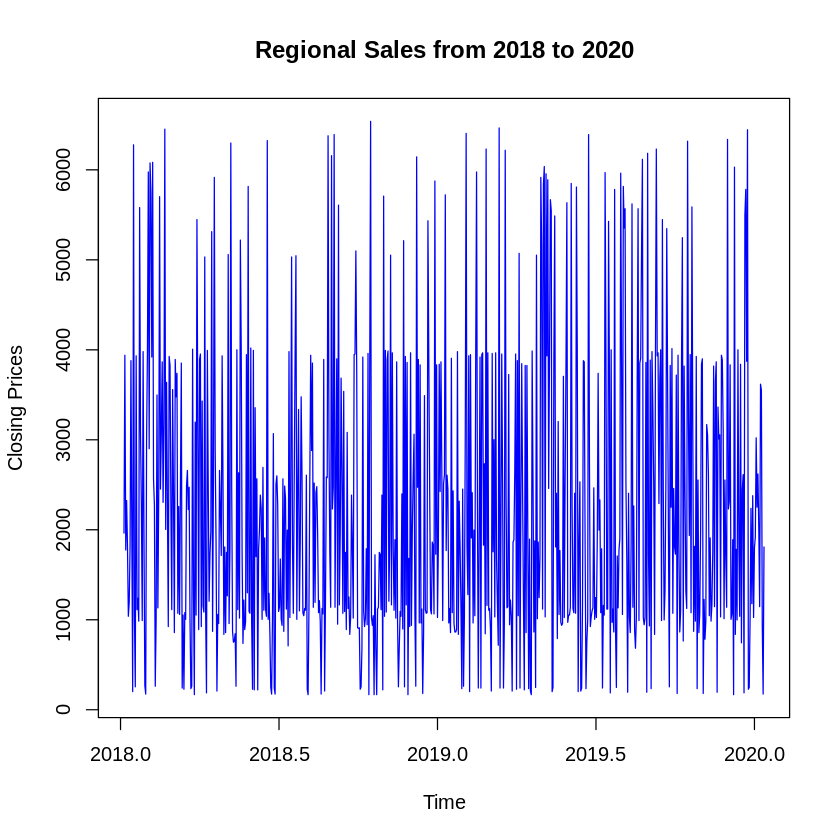

In [ ]:
plot(price.ts, type='l', col='blue', ylab="Closing Prices", main="Regional Sales from 2018 to 2020")

ACF and PACF Plots for the Data

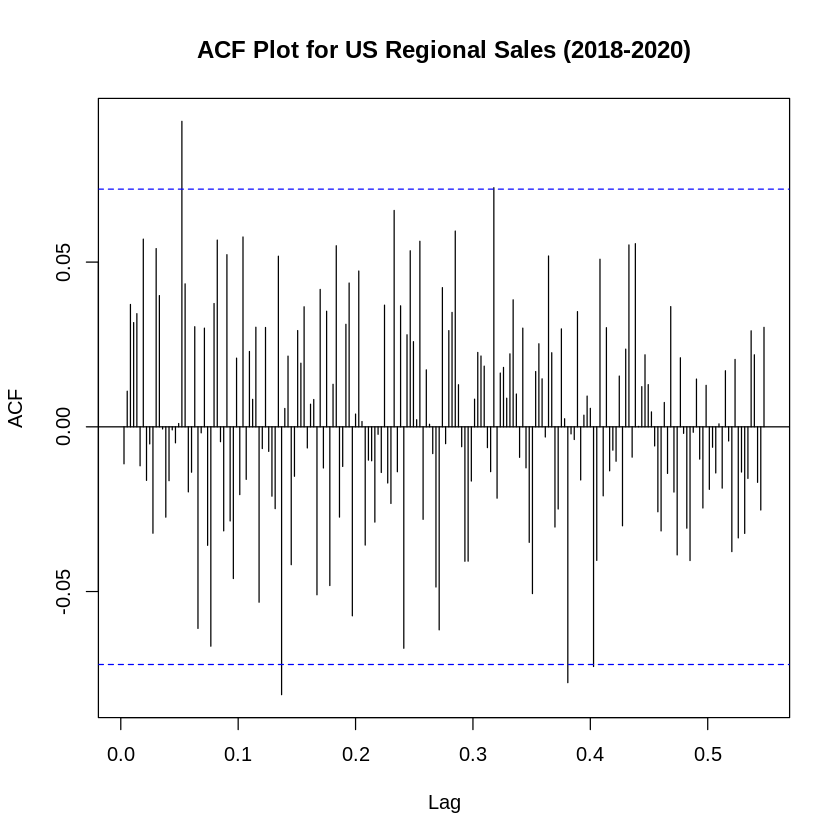

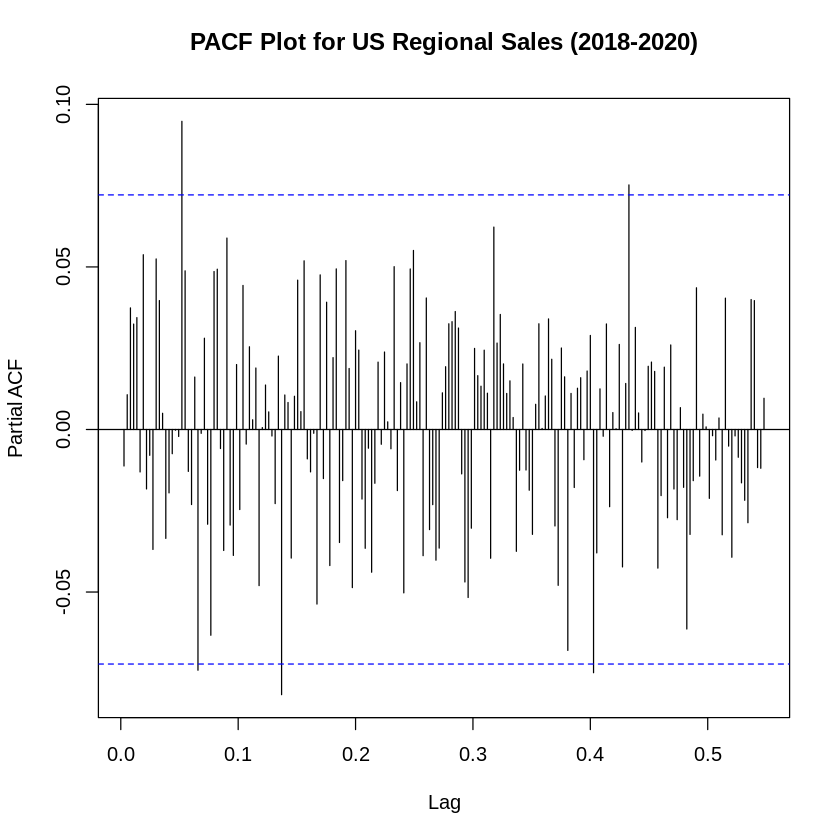

In [ ]:
acf(price.ts, main="ACF Plot for US Regional Sales (2018-2020)", lag.max=200)
pacf(price.ts, main="PACF Plot for US Regional Sales (2018-2020)", lag.max=200)

In [ ]:
nsdiffs(price.ts)
ndiffs(price.ts)

[1] 0

[1] 0

# Augmented Dickey-Fuller Test (CADF)

In [ ]:
CADFtest(price.ts, type="none")


	ADF test

data:  price.ts
ADF(1) = -7.3649, p-value = 2.944e-12
alternative hypothesis: true delta is less than 0
sample estimates:
     delta 
-0.2065484 


From the Augmented Dickey Fuller Test, we can observe that the p-value is very small, which clearly rejects the Null Hypothesis, and thus we can conclude that the series is **Stationary**.

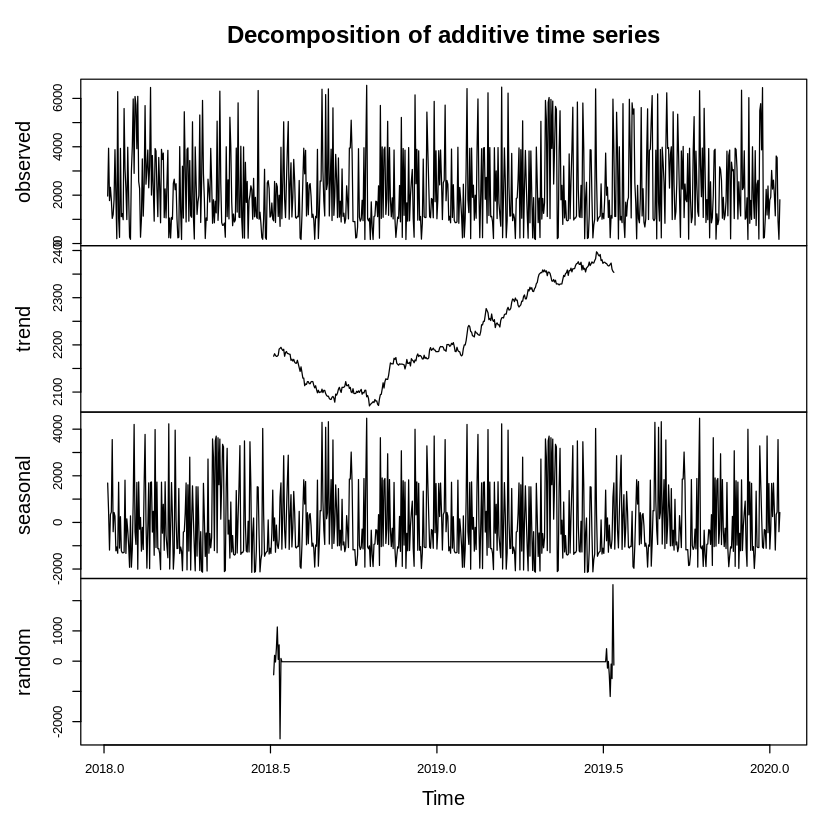

In [ ]:
decomposed_series = decompose(price.ts)
plot(decomposed_series)

In [ ]:
eacf(price.ts)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x o x x o o o o o o o  o  o  o 
5 x x x o x o o o o o o  o  o  o 
6 x x x o x x o o o o o  o  o  o 
7 x x x x x o x o o o o  o  o  o 


From the eacf plot, since the series is stationary we can estimate the candidate models to be ARMA(1,1), ARMA(1,2), ARMA(2,2), ARMA(2,3), ARMA(3,3), ARMA(3,4), ARMA(4,4), ARMA(4,5), ARMA(5,5), ARMA(5,6) and ARMA(6,6).

# Modeling

In [ ]:
ARMA11 = Arima(price.ts, order = c(1,0,1), method="ML")
ARMA11

Series: price.ts 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1       mean
      -0.0057  -0.0054  2271.0865
s.e.   1.2852   1.2706    59.7516

sigma^2 = 2704847:  log likelihood = -6510.77
AIC=13029.54   AICc=13029.59   BIC=13047.95

In [ ]:
ARMA12 = Arima(price.ts, order = c(1,0,2), method="ML")
ARMA12

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: price.ts 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
          ar1      ma1    ma2       mean
      -0.0052  -0.0066  0.011  2271.0802
s.e.      NaN      NaN    NaN    60.3629

sigma^2 = 2708200:  log likelihood = -6510.72
AIC=13031.45   AICc=13031.53   BIC=13054.47

In [ ]:
ARMA22 = Arima(price.ts, order = c(2,0,2), method="ML")
ARMA22

Series: price.ts 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
          ar1     ar2      ma1     ma2       mean
      -0.0052  0.0055  -0.0061  0.0056  2271.0806
s.e.   1.3703  1.8502   1.4504  1.8704    60.4067

sigma^2 = 2711898:  log likelihood = -6510.72
AIC=13033.45   AICc=13033.56   BIC=13061.07

In [ ]:
ARMA23 = Arima(price.ts, order = c(2,0,3), method="ML")
ARMA23

Series: price.ts 
ARIMA(2,0,3) with non-zero mean 

Coefficients:
          ar1     ar2     ma1      ma2     ma3       mean
      -0.0489  0.8001  0.0385  -0.7965  0.0582  2269.0104
s.e.   0.1807  0.1791  0.1827   0.1905  0.0410    72.4971

sigma^2 = 2696785:  log likelihood = -6508.19
AIC=13030.37   AICc=13030.53   BIC=13062.6

In [ ]:
ARMA33 = Arima(price.ts, order = c(3,0,3), method="ML")
ARMA33

Series: price.ts 
ARIMA(3,0,3) with non-zero mean 

Coefficients:
         ar1     ar2      ar3      ma1      ma2     ma3       mean
      0.2273  0.7359  -0.3263  -0.2356  -0.7363  0.3858  2270.7466
s.e.  0.5518  0.2341   0.5696   0.5389   0.2337  0.5601    68.5592

sigma^2 = 2700389:  log likelihood = -6508.18
AIC=13032.35   AICc=13032.55   BIC=13069.18

In [ ]:
ARMA34 = Arima(price.ts, order = c(3,0,4), method="ML")
ARMA34

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: price.ts 
ARIMA(3,0,4) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ma1    ma2      ma3     ma4       mean
      0.6484  -0.7348  0.8883  -0.6569  0.753  -0.8986  0.0553  2264.7293
s.e.     NaN      NaN     NaN      NaN    NaN      NaN  0.0358    76.1827

sigma^2 = 2674011:  log likelihood = -6504.23
AIC=13026.47   AICc=13026.72   BIC=13067.9

In [ ]:
ARMA44 = Arima(price.ts, order = c(4,0,4), method="ML")
ARMA44

Series: price.ts 
ARIMA(4,0,4) with non-zero mean 

Coefficients:
         ar1      ar2     ar3     ar4      ma1     ma2      ma3      ma4
      0.5424  -0.6798  0.8152  0.0877  -0.5549  0.7034  -0.8260  -0.0290
s.e.  0.3901   0.3034  0.2886  0.3999   0.3896  0.2991   0.2813   0.3964
           mean
      2266.2188
s.e.    74.6692

sigma^2 = 2676241:  log likelihood = -6504.1
AIC=13028.2   AICc=13028.5   BIC=13074.24

In [ ]:
ARMA45 = Arima(price.ts, order = c(4,0,5), method="ML")
ARMA45

Series: price.ts 
ARIMA(4,0,5) with non-zero mean 

Coefficients:
          ar1      ar2     ar3     ar4     ma1     ma2      ma3      ma4
      -0.3839  -0.2271  0.0884  0.7640  0.3768  0.2316  -0.0542  -0.7200
s.e.   0.2234   0.2871  0.2746  0.2333  0.2241  0.3046   0.2978   0.2514
         ma5       mean
      0.0779  2267.8889
s.e.  0.0431    71.7292

sigma^2 = 2668909:  log likelihood = -6502.57
AIC=13027.15   AICc=13027.51   BIC=13077.79

In [ ]:
ARMA55 = Arima(price.ts, order = c(5,0,5), method="ML")
ARMA55

Series: price.ts 
ARIMA(5,0,5) with non-zero mean 

Coefficients:
          ar1      ar2     ar3     ar4     ar5     ma1     ma2      ma3
      -0.6787  -0.2885  0.1548  0.8736  0.3470  0.6700  0.2973  -0.1223
s.e.   0.5684   0.2248  0.2345  0.3073  0.5329  0.5806  0.2513   0.2633
          ma4      ma5       mean
      -0.8353  -0.2649  2275.3457
s.e.   0.3292   0.5539    74.9096

sigma^2 = 2671330:  log likelihood = -6502.39
AIC=13028.78   AICc=13029.21   BIC=13084.03

In [ ]:
ARMA56 = Arima(price.ts, order = c(5,0,6), method="ML")
ARMA56

Series: price.ts 
ARIMA(5,0,6) with non-zero mean 

Coefficients:
          ar1     ar2     ar3     ar4      ar5     ma1      ma2      ma3
      -0.1092  0.4107  0.7765  0.3836  -0.5524  0.1075  -0.3952  -0.7421
s.e.   0.5764  0.4871  0.1557  0.3678   0.4675  0.5776   0.4888   0.1586
          ma4     ma5      ma6       mean
      -0.3628  0.5770  -0.0708  2271.0108
s.e.   0.3598  0.4471   0.0583    74.6853

sigma^2 = 2664959:  log likelihood = -6502.9
AIC=13031.81   AICc=13032.31   BIC=13091.66

In [ ]:
ARMA66 = Arima(price.ts, order = c(6,0,6), method="ML")
ARMA66

Series: price.ts 
ARIMA(6,0,6) with non-zero mean 

Coefficients:
          ar1     ar2     ar3     ar4      ar5      ar6     ma1      ma2
      -0.2148  0.5082  0.3983  0.8809  -0.1728  -0.5437  0.2281  -0.4911
s.e.   0.1977  0.1779  0.0614  0.1045   0.2328   0.2049  0.2104   0.1897
          ma3      ma4     ma5     ma6       mean
      -0.3991  -0.8660  0.2011  0.5026  2284.2406
s.e.   0.0724   0.1125  0.2458  0.2198    72.9665

sigma^2 = 2683011:  log likelihood = -6502.97
AIC=13033.93   AICc=13034.52   BIC=13098.39

AIC Summary:

1. ARMA(1,1) - AIC=13029.54
2. ARMA(1,2) - AIC=13031.45
3. ARMA(2,2) - AIC=13033.45
4. ARMA(2,3) - AIC=13030.37
5. ARMA(3,3) - AIC=13032.35
6. **ARMA(3,4) - AIC=13026.47**
7. ARMA(4,4) - AIC=13028.2
8. ARMA(4,5) - AIC=13027.15
9. ARMA(5,5) - AIC=13028.78
10. ARMA(5,6) - AIC=13031.81
11. ARMA(6,6) - AIC=13033.93

From the above candidate models, ARMA(3,4) has the lowest AIC score.

# Diagnostics

Residual Analysis

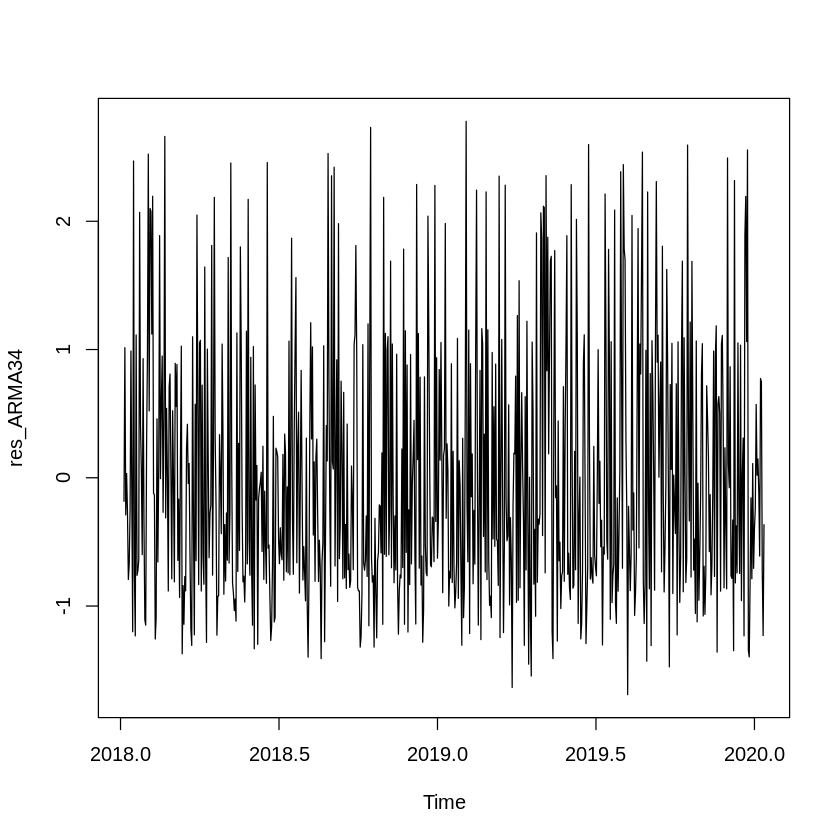

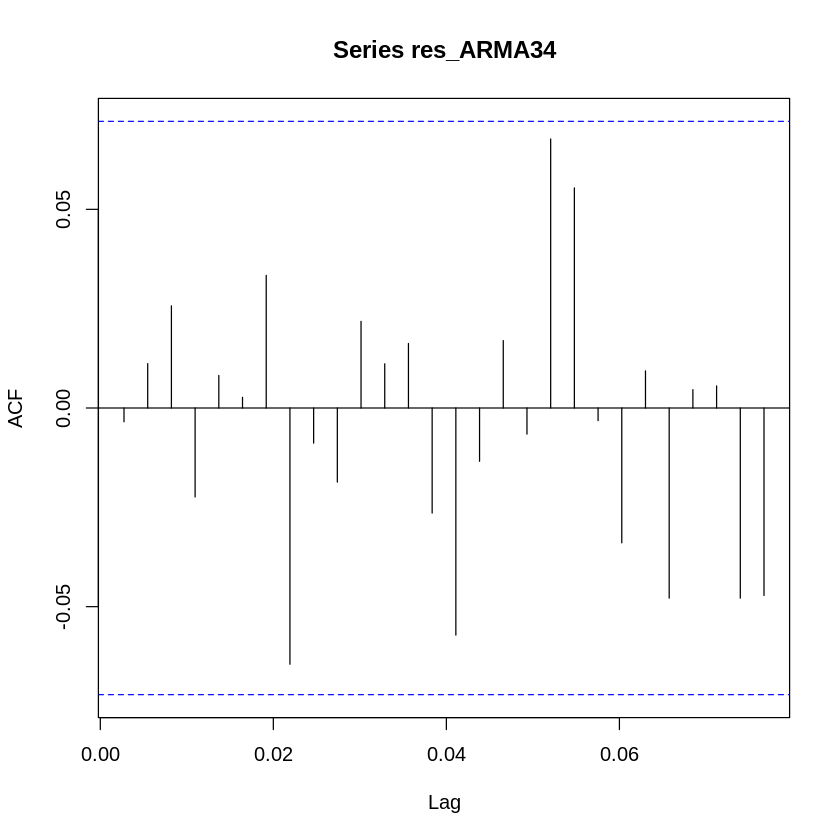

In [ ]:
res_ARMA34 = rstandard(ARMA34)
plot(res_ARMA34)
acf(res_ARMA34)

Ljung-Box Test

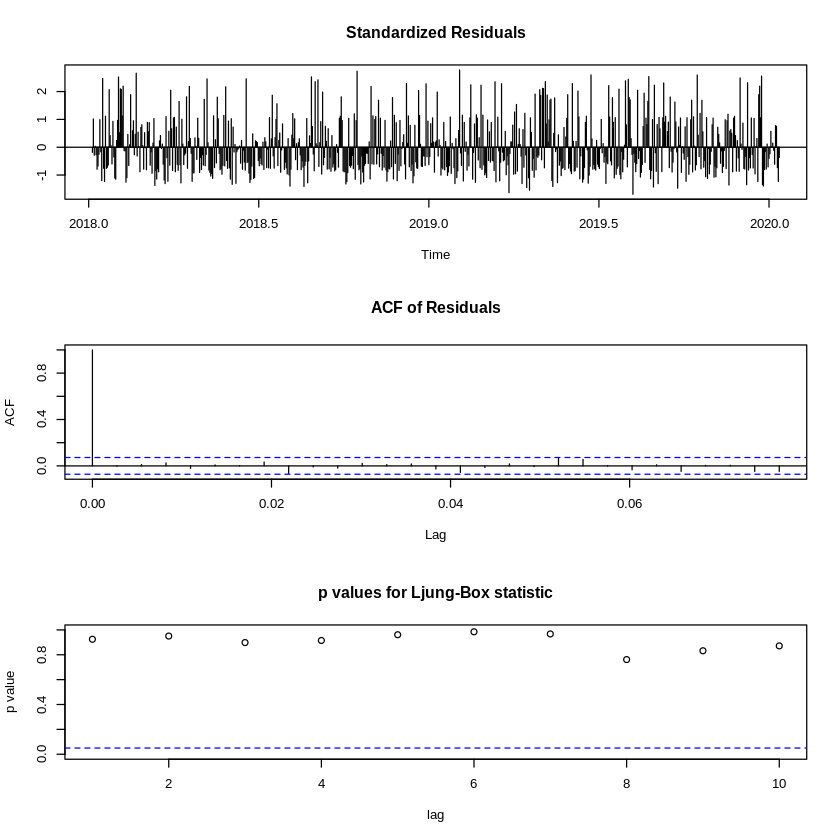

In [ ]:
tsdiag(ARMA34, gof=10, omit.initial = F, lwd=2)

From the LB test results, since all the p-values lie above 0.5, we can conclude that the model is a good fit for the data.

Normality Check

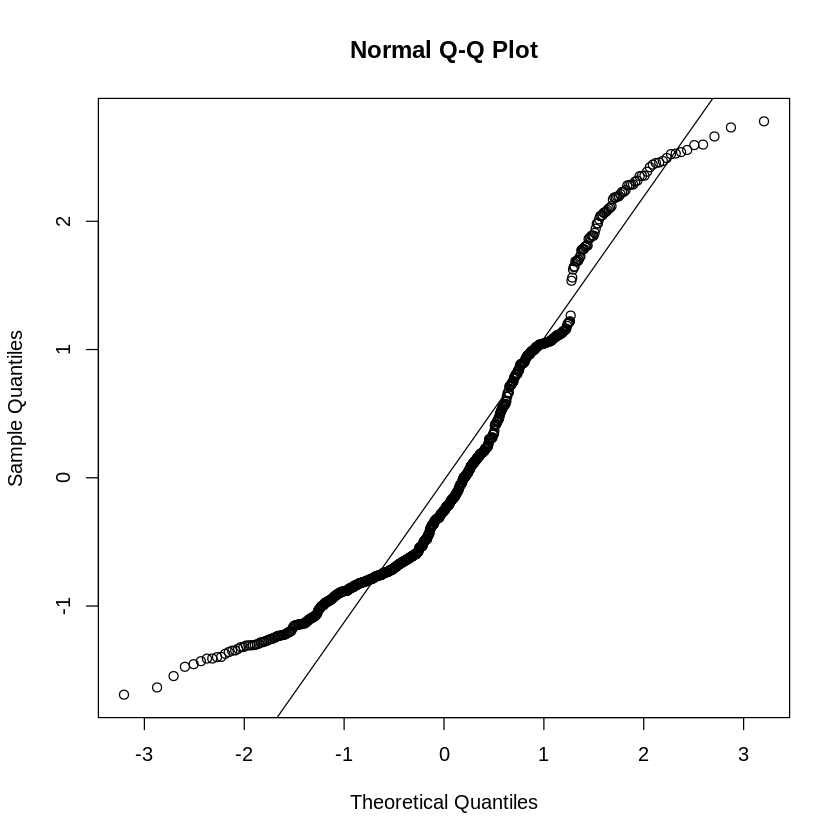

In [ ]:
qqnorm(res_ARMA34)
qqline(res_ARMA34)

Shapiro-Wilk Test

In [ ]:
shapiro.test(res_ARMA34)


	Shapiro-Wilk normality test

data:  res_ARMA34
W = 0.92446, p-value < 2.2e-16


We can observe from the Normality test that Residuals are not normally distributed.

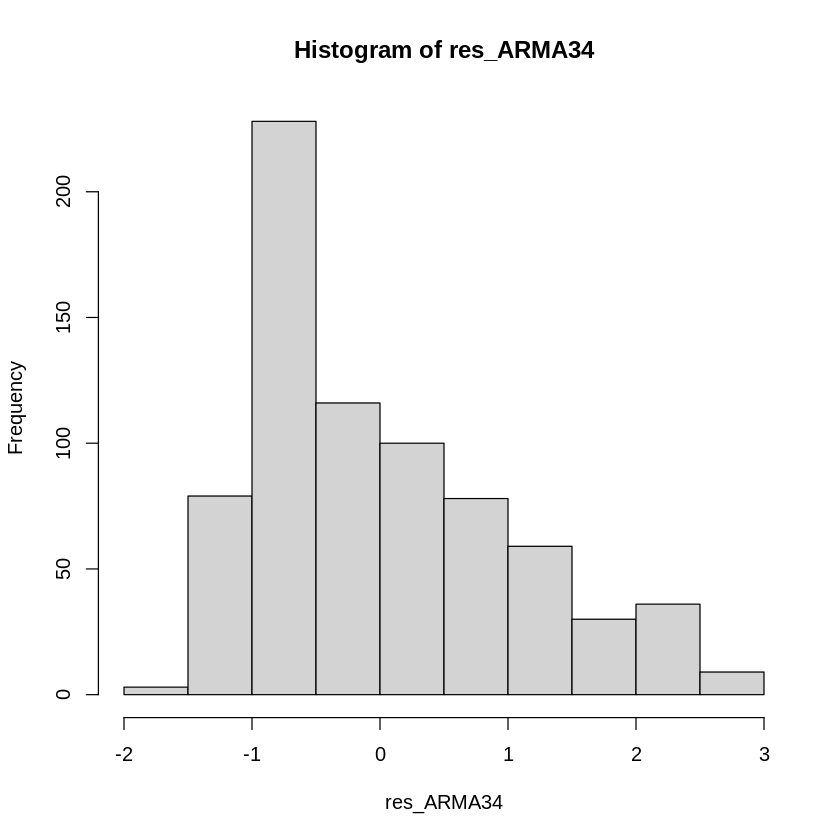

In [ ]:
hist(res_ARMA34)

Clearly, from histogram of residuals, we can observe that the residuals are not normally distributed.

In [ ]:
LB.test(ARMA34)


	Box-Ljung test

data:  residuals from  ARMA34
X-squared = 5.7335, df = 5, p-value = 0.333


From the Ljung-Box statistic, the p-value=0.333 > 0.05. Thus, we fail to reject H0, and can conclude that the error terms are uncorrelated.

# Forecasting

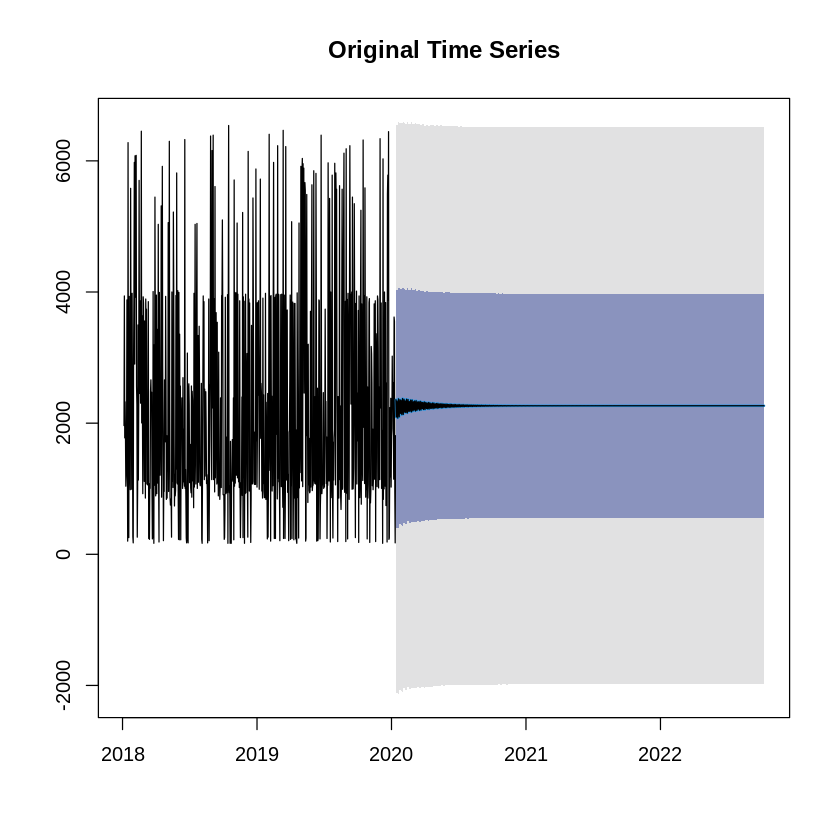

In [ ]:
fc.ARMA34 = forecast(ARMA34, h=1000, level=c(70,99))
predict_ARMA34 = predict(fc.ARMA34, n.ahead=10000)
plot(fc.ARMA34, main="Original Time Series")
lines(predict_ARMA34$mean)

From the forecast plot, we can say that, the forecast is approximately equal to mean and thus it is a straight line except for the initial future time periods.